### Group Members: 


# Background
A central problem in Bayesian deep learning (BDL) modeling is uncertainty evaluation, i.e. which models give reasonable epistemic and aleatoric uncertainty estimates. This is a difficult problem to solve because high-dimensional data cannot be visualized in a meaningful way. This problem was encountered early in AM 207. Recall from HW2 that using naive methods for uncertainty evaluation, such as computing the marginal log-likelihood of the data under the posterior, gave misleading results when compared to a visualization of the data and the 95% posterior predictive interval. 

As a result of this difficulty, a set of standardized "benchmarks", or training data, have naturally arisen in the BDL community. One popular benchmark is the UCI datasets, which is a repository of (among other things) classification and regression training data. These benchmarks have well established uncertainty estimates, and in some cases can be meaningfully visualized $^{1}$. These standardized benchmarks are used as training data whenever a new BDL model is proposed. Since the uncertainties are known for these training sets, the proposed model uncertainty estimates can be used as a metric for how well the model fits the data.


# Problem Statement
The paper "A Systematic Comparison of Bayesian Deep Learning Robustness in Diabetic Retinopathy Tasks", which will be reffered to as Filos et al., begins by critiquing the widely used UCI benchmarks:

_"Many BDL papers use benchmarks such as the toy UCI datasets, which consist of only evaluating root mean square error (RMSE) and negative log-likelihood (NLL) on simple datasets with only a few hundred or thousand data points, each with low input and output dimensionality."_

In particular, Filos et al. claims that the UCI datasets are adkin to toy data and do not reflect how real-world data behaves: 

_"Despite BDL’s impact on a range of real-world applications, the development of the field itself is impeded by the lack of realistic benchmarks to guide research... Due to the lack of alternative standard benchmarks, in current BDL research it is common for researchers developing new inference techniques to evaluate their methods with such toy benchmarks alone, ignoring the demands and constraints of the real-world applications which make use of BDL tools"_

Clearly, if the above statements are true, there is a need for a new benchmark which acknowledges the demands and constraints of real-world applications. The paper proposes such a dataset: a training set made up of 512 × 512 RGB images of retinas. The goal is to identify which retinas have a high probability of having diabetic retinopathy and which do not. If the model is uncertain, it should refer the particular picture to a human expert. Filos et al. builds on previous medical work and presents a series of tasks which it claims to be robust against distributional shift and OOD. 

# Existing Work
Previous work on using uncertainty estimates from deep learning models to inform decision referrals in diabetic retinopathy diagnosis was done by Leibig et al. 
They used the same benchmark as in Filos et al., which is taken from the Kaggle Diabetic Retinopathy (DR) Detection Challenge. 
Each image is graded by a specialist on the following scale: 0 – No DR, 1 – Mild DR, 2 – Moderate DR, 3 – Severe DR and 4 – Proliferative DR. 
The 5-class classification task is recast as a binary classification via the following: sight-threatening DR is defined as Moderate DR or greater (classes 2-4). 
The data is augmented using affine transformations, including random zooming (by up to ±10%), random translations (independent shifts by up to ±25 pixels) and random rotations (by up to ±$\pi$). 
Filos et al. also did this.

Leibig et al. used two deep convolutional neural networks (DCNN) as their architecture and MC dropout to perform approximate inference. 
One of the DCNN's, named JFnet, is a publicly available network architecture and weights which was trained on  participants who scored very well in the Kaggle DR competition. 
The other DCNN was built by Leibig et al. and is essentially JFnet with some major tweaks, the largest being that dropout was added after each convolutional layer, hence making this DCNN more Bayesian than JFnet. 

Leibig et al. uses predictive uncertainty, receiver-operating-characteristics (ROC) curves, and the area under a ROC curve, the AUC, as measures of uncertainty for their DCNN's. 
Importantly, they never claim that their training images nor their methods for uncertainty estimation should be used as a standard benchmark in the BDL community. 

# Contribution 
Filos et al. extends the work done by Leibig et al. Filos et al. fits the diabetic retinopathy diagnosis image data on more BDL methods such as MFVI, deep ensembles, and determinisitc, along with MC dropout. 
Filos et al. uses the same uncertainty metrics used in Leibig et al. to measure how well the method fit the data. 
It contrasts these uncertainty estimations with those from the same BDL methods run on UCI training sets. 
It concludes that these commonly used BDL methods are overfitting their uncertainty in the UCI training data sets (technical details below).

Filos et al then points out that the uncertainty metrics used in Leibig et al. are able to asses robustness to OOD data and distributional shift, and are simple to implement and use**:

*"We extend this methodology (from Leibig et al) with additional tasks that assess robustness to out-of-distribution and distribution shift, 
using test datasets which were collected using different medical equipment and for different patient populations. 
Our implementation is easy to use for machine learning researchers who might lack specific domain expertise, 
since expert details are abstracted away and integrated into metrics which are exposed through a simple API." *

Using the arguments above, Filos et al. then proposes the retinopathy diagnosis image data as a standardized benchmark for all new models in the BDL community. 
Additionally, they propose the uncertainty metrics as a standarized uncertainty metric for the BDL community.

**the validity of this statement is the subject of this group's experimentation

# Technical Details
## Overview

In Filos et al., the authors benchmarked the performances of four baselines on the Kaggle Diabetic Retinopathy (DR) Detection Challenge data:
MFVI, Deterministic, MC Dropout, and deep ensembles of deterministic and MC Dropout models. 
The implementation is the same binary classification problem as Leibig et al. (see Existing Work).
The authors use the predictive entropy as the uncertainty estimator for MVFI, MC Dropouut, deep ensembles, which is defined as follows: 

$$
\mathcal{H} := -\sum_c p(y = c \mid {\bf x} ) \log p (y = c \mid {\bf x} ),
$$
where $c$ denotes a class and in their case, $c \in \{0, 1\} $ and $p$ is the sigmoid probability approximated by $T$ Monte Carlo samples $ p \approx \frac{1}{T} \sum_t p_\theta (y = c \mid {\bf x})$.
For the deterministic model, the authors use the sigmoid probability as the uncertainty estimator. 

The core idea is to rank the uncertainty of the prediction, and if the uncertainty is higher than a certain threshold, the prediction should not be trusted and will be referred to expert.
The authors then plot the accuracy of the prediction as a function of the retained data percentage. 
As more data being referred to experts (i.e., as the retained data decreases), the accuracy is expected to go up if the model gives a sound uncertainty estimate. 
Moreoever, a more drastic increase as more data is taken out is more desirable. 


We include more details below. 

## Architecture and Training Data

The following information borrows heavily from the "Architecture" section of Filos et al. Filos et al. used a variety of deep convolutional neural network models, 
but all are varients of the VGG architecture with 2.5 million parameters, 
and were all trained using ADAM ($\eta = 4\times10^{-4}$, batch size 64). The activation function was a Leaky ReLU for the hidden layers and a sigmoid for the output layer with randomly initialized weights.

The following information borrows heavily from Section 2 of Filos et al. The Kaggle Diabetic Retinopathy (DR) Detection Challenge data consists of 35,126 training images and 53,576 test images. 
20% of the training data is held-out and used as validation. 
The data is unbalanced: 19.6% of the training set and 19.2% of the test set have a positive label, with positive defined previously (see Existing Work). 
This inbalance was accounted for by adding more weight to positivly labelled images in the cost/loss function, i.e. the function that ADAM is trying to minimize.

## Methods

The four methods used in Filos et al. are MFVI, Deterministic, MC Dropout, and deep ensembles of deterministic and MC Dropout models. 
All methods were tuned seprately and the results reported in Filos et al. are averages over nine independent models, each using a different random seed. 
Of these methods, MFVI and determinsitc have already been covered in class. 
The idea behind deeps ensembles is the same as in HW2: 
fit a large number of (bootstrap) deep models on the training data, then, at an input $x$, use the variance of the ensemble predictions to estimate the uncertainty at $x$. 
The remaining method is MC Dropout. Dropout is a regularization technique were one randomly zeroes out a set of weights during training. 
Monte Carlo samples can be drawn from this neural network by using dropout at test time. 
Finally, for deep ensembles of MC Dropout models: *"in this technique, several dropout models are separately trained in parallel. 
Predictions are then made by sampling repeatedly from all models in the ensemble using fresh dropout masks for each sample, before being averaged, to form a Monte Carlo estimate of the ensemble prediction."*

## Uncertainty Estimation

Figure 4 of Filos et al. shows the relationship between the sigmoid output and the predictive entropy for MC dropout for the correctly and incorreclty labelled images. MC dropout has higher entropy for the miss-classified images! Filos et al. uses this figure as justification for using predcitive entropy as a measure of uncertainty. The paper notes that "predictive uncertainty is the sum of epistemic and aleatoric uncertainty", and hence more work is needed to distinguish the two types of uncertanities apart.

The following information borrows heavily from the "Metrics" section of Filos et al. Recall that the purpose of uncertainty estimation is to flag images where diagnosis in uncertain and refer these images to a medical professional, and relying on the models predictions when it is certain. To simulate this process, uncertainty estimation was measured using "diagnostic accuracy and area under receiver-operating-characteristic (ROC) curve, as a function of the referral rate. We expect the models with well-calibrated uncertainty to refer their least confident predictions to experts ... improving their performance as the number of referrals increases." Diagnostic accuracy is self-explanatory, it is the ratio of the correctly classified data points over the total number of data points. The ROC shows how the diagnostic accuracy changes as a function of referral rate. It is created by plotting the true positive rate, those with diabetic retinopathy and were correctly labelled as so (sensitivity), vs false positive rate, i.e. those without diabetic retinopathy but were labelled as having it (a.k.a. 1 − specificity). The AUC is simply the total area under the curve of the ROC. It varies between 0.5 (chance level) and 1.0 (best possible value). The ROC and AUC plots are included in Figures 5 and 6 of Rilos et al.

# Experiments
## ROC and AUC Plots 

Let's walk through an example experiment to understand Figure 6, the ROC plots. 
After training a model, like MC Dropout, on the diabetic retinopathy images, the predictive entropy of each test image is calculated. 
For a given fraction of retained data, say 0.9, the images with the highest 10% of entropies get thrown out and reffered to a human expert. 
The remaining 90% of the images are then examined. Each image will have a corresponding sigmoid probability from the model. 
The threshold for deciding which images have diabetic retinopathy and which do not based on the sigmoid probabiltiy is varied, 
resulting on different values for the sensitivity and specificity for each threshold. 
The plots in Figure 6 are the ROC plots for all the methods at 60% and 90% data retained, 
using the test images from the Kaggle Diabetic Retinopathy (DR) Detection Challenge data. 
Since each value for the percentage of data retained yeilds a ROC, it also yeilds a AUC. 
The plots for AUC vs data retained is in Figure 5a. 
Figure 5b is simpler: it simply plots the binary accuracy of each method as a function of retained data. 
No ROC plots were generated.


## Robustness to OOD and Distributional Shift

Robustness to distribution shift is evaluated by training on the diabetic retinopathy data detailed in a previous section, 
and comparing the results to "a completely disjoint APTOS 2019 Blindness Detection dataset collected in India with different medical equipment and on a different population." 
This is done in Figures 5c and 5d of the paper. 
The test images are switched from the Kaggle Diabetic Retinopathy (DR) Detection Challenge data to the APTOS Blindness Detection dataset. 
The general trends stay the same, i.e. Ensemble MC Dropout performs the best out of all the models. 
These two figures are the justification for claiming that the uncertainty metrics are robust to distributional shift and OOD data.




# Evaluation (UNFINISHED)
The paper Filos et al. is overall a well-written paper which builds on previous work done by Leibig et al. to build an open-source benchmark with straightforward uncertainty estimates for diagnosing diabetic retinopathy. 
There is no doubt that the paper will allow for researchers with little medical experience to more easily use state-of-the art BDL algorithms that diagnose diabetic retinopathy. 
Other claims made by the paper, however, such as claiming that the uncertainty estimates are robust to OOD data and distributional shifts, 
along with the claim that the diabetic retinopathy benchmark should replace UCI as the standard benchmark for the BDL community, are at best shaky.

First, the evidence presented by Filos et al. for why their uncertainty estimate metrics are robust to OOD and distributional shift is Fig 5c and 5d. 
In these figures, all methods were trained using the Kaggle Diabetic Retinopathy (DR) Detection Challenge dataset, and tested on images taken from the APTOS Blindness Detection, which is from India. 
Though it is true that the APTOS dataset comes from a different country with different medical equipment, medical procedures and equipment tend to be standardized even across different countries. 
There is no reason to expect medical equipment from the United States to vary in any statistically significant way from those in India. 
Additionally, both the Kaggle and APTOS images were most likely taken under similar circumstances. It is not clear to the members of this group why the Kaggle and APTOS images must be neccessarily from different distributions or why a large distributional shift is expected among these two datasets. 
It follows that the members of this group do not believe the conclusion from Filos et al. that the uncertainty estimates are robust to OOD data and distributional shift.

Second, Filos et al. makes a very strong statement: that the diabetic retinopathy training sets should replace the UCI benchmarks as a standardized benchmark for the BDL community. They claim that the UCI benchmarks are not realistic:

*"Due to the lack of alternative standard benchmarks, in current BDL research it is common for researchers developing new inference techniques to evaluate their methods with such toy benchmarks alone, **ignoring the demands and constraints of the real-world applications which make use of BDL tools**".*

but the meaning of "the demands and constraints of real-world applications" is never given. 
What complexities does real-world data have that the UCI benchmark does not? 
More importantly, why is it about the diabetic retinopathy data that makes it more "real-world" than the UCI data? 
Is it higher input and output dimensionality? 
Is it higher class overlap? 
The fact that Filos et al. never elaborates on this makes the paper's main claim much weaker.



## Our Experiments

The central contribution of the paper Filos et al. is to use the uncertainty estimation metrics proposed by Leibig et al., as a standardized benchmark for all new models in the BDL community. In particular, the paper claims that classification models such as ensemble methods and MC Dropoup preform better than MFVI on real-world applications (the definition of real world is not made clear). This is somewhat surprising, since, according to reference 4 of Filos et al. , MFVI preforms better than these two models on standard UCI benchmarks.

The paper then concludes that models such as ensemble methods and MC Dropoup are overfitting their uncertainty in the UCI training data sets, which are lower dimensional than the DRD datasets. The purpose of the code below is to explore this claim. In particular, what is it about the diabetic retinopathy data that makes ensemble methods and MC Dropout good fits, and what is it about the UCI data that makes MFVI a good fit?

We will run simplified versions of the methods developed in Filos et al. on the following 2D toy data sets with two classes (0 and 1): 

1. Spatially separated Gaussian blobs 
2. Out-of-distribution tet points
3. Significant class overlap
4. Simulate high dimensional data (i.e. distance between points blown up)
5. Crescent moon

To begin with, all our methods (except for MFVI) are neural networks of the following form: 
$$\mathbf{W} \sim \mathcal{N}(0, \sigma_{W}^2 \mathbf{I}{D\times D})\mathbf{w}^{(n)} = g{\mathbf{W}}(\mathbf{X}^{(n)})\ Y^{(n)} \sim Ber(\text{sigm}(\mathbf{w}^{(n)}))$$.

We modified the neural network and BBVI code from class to implement MFVI, deterministic, MC dropout, and deterministic ensembles. 
We fine-tuned each model to each toy data set type. We generated data with equal positive and negative classifications to avoid the class imbalance problem that Filos et al. faced. Finally, instead of generating ROC plots, we used the binary accuracy of each model to measure its uncertainty.
We visualized the decision boundary, uncertainty distributions of these models to access their performances,
and implemented the proposed uncertainty metric in attempt to evaluate the performances of the models. 
We aim at testing whether the proposed uncertainty metric is appropriate for 
identifying out-of-distribution (OOD) points and improving accuracy of the prediction 
in the presence of OOD data. Moreover, we use the proposed uncertainty metric to 
benchmark four models.
We found that the uncertainty metric is not always capable of identifying OOD points, 
and therefore is not a reliable and consistent benchmark for the four models. 

Below we provide a summary of the central conclusions from each experiment we performed. 
For clarity, the details and most of the plots generated in each experiment are omitted
here for ease of reading. All of this information and code can be found below the summary
section, along with more in depth analysis of each experiment.

### Conclusions from Experiment 1
Experiment 1 is the most simple and straight-forward case -- the two Gaussian blobs are well-separated, and there is not distribution shift. 
The accuracy increases as more data is included. This shows that the model is confident where it should be. 
However, because there is no distribution shift, this particular experiment is not conclusive about whether the metric can evaluage the episdemic uncertainty of the models.
We will compare and contrast later experiments with this case. 

### Conclusions from Experiment 2

For this experiment, we looked at two different training sets along with out of distribution
points for the test set. The primary take away from our analysis of this experiment along
is that this experiment
supports the claim that the uncertainty metric used is robust to OOD points. However,
we will test this further in other experiments. When a model
sees OOD points in our tests, the accuracy on test points as a whole goes down as less
data is retained. This is an indication that the model is uncertain about the wrong kinds
of test points, which is a problem that one would hope to be able to identify in a model
using this metric. In other words, each model confidently makes incorrect predictions while
making correct predictions with less confidence. 

However, this experiment does not let us draw any conclusions regarding the utility of 
the different model classes on real life data. In particular, all models studied here
performed quite poorly on identifying OOD points. We note that for MC dropout, changes
to the neural network architecture led to different uncertainty results that may be slightly
better, but this came at the cost of worse decision boundaries in the data-rich regions.


### Conclusions from Experiment 3 

In this experiment, we used two overlapping Gaussians as our training set, and test the models on test sets of different degrees of overlap. 
The main conclusion of this experiment is that the uncertainty metric is capable of detecting distribution shift and out of distribution test data to some degree based on the magnitude of the accuracy and the steepness of the accuracy vs. retained data curve. 
Overall, the larger the class overlap, the poorer the performance of the baselines as expected. 
However, in some cases, the model fails to capture the distribution shift and out-of-distribution point, especially when the additional test datasets are well separated (see test data set 2).
This is because the test points fall in data-sparse regions with a low uncertainty predicted by the models. 
That is, the models are confident when it shouldn't have been. 
The uncertainty metric is incapable of distinguishing this case of out-of-distribution point. 
This suggests that we should not trust the metric for the eleatoric uncertainty. 

Like in Experiment 2, this experiment is inconclusive about which model has a better performance in terms of the uncertainty. 
The performance of the model under the uncertainty metric depends heavily on the details of the test data.

### Conclusions from Experiment 4
In this experiment, we placed two clusters of red points -- one major cluster and another set of outliers that lie on the far side of the typical decision boundary separating the red and blue blobs.

### Conclusions from Experiment 5

In this experiment, we wanted to simulate how the metrics preforms on high dimensional data. 
For simplicity, we will stick to classifying two high dimensional Gaussian distribution blobs. Since running 
the models and metrics on samples from a high dimensional Gaussian would be difficult to 
visualize and computaionally expensive, we instead simulated what high dimensional 
Gaussian data would "look like" in 2D. According to Hall et al, for a given number of samples
 n of a high dimensional Gaussian distribution, as  $d \rightarrow \infty$  (keeping n constant):

1. The distance between a sampled vector and the mean goes as  $\approx d^{1/2}$
2. The distance between any 2 sampled vectors goes as  $\approx (2d)^{1/2}$ 
3. The angle between any 2 sampled vectors, with the mean as the origin, tends to  $\approx \frac{\pi}{2} + O(d^{-1/2})$

In summary, all pairwise distances are approximately equal, all pairwise angles are approximately  
$\frac{\pi}{2}$ , and the samples tends to be near the surface of an expanding sphere of radius 
$d^{1/2}$ . It is impossible to replicate all these tendencies together in 2D, so I instead 
investigated these 3 tendencies separately. For 1, I drew samples from a uniform distribution
on a circle of radius  $r$, where I varied  $r$ . For 2, I amplified the distance between each
sample of each Gaussian blob to an arbitrarily high value. 3 is the toughest, since it is impossible 
to have more than 2 points that are simutanteously perpendicular to each other in 2D.

Starting with 1, each Gaussian blob is now a circle. The distance from center of the two blobs,
d, will be on the same order as the radius of the blobs, r, with  $d>r$ , to avoid class overlap, yet
respecting that in high dimensions, all points are approximately equadistant. The results are virtually the same
as in Experiment 1. This tells us that the model fits do not care if the "blobs" are Gaussian spread or uniformly 
sampled from a circle with radius approximately equal to the standard deviation of the Gaussian spread. So long
as the blobs are cleanly separated, the results will be the same. 
 
Now with 2, I generated two Gaussian blobs identically to Experiment 1, but with the standard deviation blown up to
a high value. This is to simulate the tendency of the distance between any two points in arbitrarily high dimensions
to diverge. It turns out that getting our implementations of neural networks to converge in this sceario is very 
difficult. I was able to get the  MFVI and deterministic models to converge and yeild reasonable decision boundaries.
It appears that the proposed uncertainty metrics are robust against large distances between individual points.

Now with 3, 


### Analysis from all Experiments

In experiment 2, there was an indication that the proposed uncertainty metric may be
appropriate for identifying out of distribution points. This was because the accuracy
curve indicated the model making incorrect predictions when it shouldn't have.
 However, in experiment 3, the opposite was true. When the test said was engineered 
 differently, but with test points still placed out of distribution, the accuracy curve 
 showed the model made confident predictions on points that it was predicting correctly.
 
These conflicting perspectives show that the uncertainty metric is unable to identify
out of distribution points in all cases. Ideally, an uncertainty metric would show when
a model is uncertain about all types of out of distribution points, and not just a subset
of them. 

Because of this, we do not feel confident about using the uncertainty metric to evaluate 
the performance of the four models, unlike in the paper. We observe that the performances 
vary drastically depending on the experiment and the test data, and therefore contradicts 
with the authors' claims. 

# Experimental Details

In [ ]:
!pip install autograd

from baselines import *
from uncertainty import *
from utils import *

from autograd import numpy as np
from autograd import grad, elementwise_grad
from autograd.misc.optimizers import adam, sgd
from sklearn.datasets import make_moons
import numpy.random as npr
import pandas as pd
import numpy 
import scipy as sp
import matplotlib.pyplot as plt
import sys
import os
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


## Experiment 1: spatially-separated Gaussians
In this experiment, we benchmark the performances of the four baselines on two spatially separated Gaussian blobs.
The two Gaussian blobs are centered at (-1, -1) and (1, 1) and correspond to class 0 and 1 respectively. 
The test set has a similar distribution as the training set. 

Since there is no distribution shift between the test and training sets and the classes are well separated, we expect the baselines perform well under the proposed uncertainty metrics. 

In [ ]:
# generate test data
center1 = [-1, -1]
center2 = [1, 1]
spread1 = 0.5
spread2 = 0.5
n_samples = 100

x_train, y_train = make_blobs(center1, center2, spread1, spread2, n_samples)

## Training
For this data set, we use 3 hidden layers, each with 4 nodes. We use $\ell2$ regularization to avoid numerical instability. The regularization parameter is 0.0002.
 The architecture is kept consistent for all four baslines. 
 
### Deterministic Model

In [ ]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

###neural network model design choices
width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [ ]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

Iteration 0 lower bound 6.61074538434309; gradient mag: 5.339326471208111
Iteration 500 lower bound 4.490040062133226; gradient mag: 14.326575001239837
Iteration 1000 lower bound 3.067265709961616; gradient mag: 15.621866262340754
Iteration 1500 lower bound 1.9498211691978078; gradient mag: 6.491821773774359
Iteration 2000 lower bound 1.163047849179558; gradient mag: 6.888469324363559
Iteration 2500 lower bound 0.7423924998571962; gradient mag: 4.8251780403311555
Iteration 3000 lower bound 0.49837921242358957; gradient mag: 4.641839393818697
Iteration 3500 lower bound 0.3435956316644998; gradient mag: 2.4420754491527523
Iteration 4000 lower bound 0.24098798667377658; gradient mag: 1.2973305234050034
Iteration 4500 lower bound 0.16961800268841593; gradient mag: 0.7381596320341304
Iteration 5000 lower bound 0.12033803357976557; gradient mag: 0.6161681921318596
Iteration 5500 lower bound 0.08679298566308623; gradient mag: 1.0274421270964498
Iteration 6000 lower bound 0.06359545825340097; 

### Deep Ensemble



In [ ]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20

# load existing data
if os.path.exists('data/gaussian_blobs_deep_ensemble0.pkl'):
    w_bootstrap = [] 
    nn_all = []
    for i in range(N_bootstrap):
        weights_here = pickle.load(open("data/gaussian_blobs_deep_ensemble" + str(i) + ".pkl", "rb"))
        w_bootstrap.append(weights_here)

        #set random state to make the experiments replicable
        rand_state = 0
        random = np.random.RandomState(rand_state)
        nn_here = Feedforward(architecture, random=random)
        nn_here.weights = weights_here
        nn_all.append(nn_here)

# if no existing data, do a new run
else: 
    nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)
    
    # save data 
    masterdir = os.getcwd()
    for (i,nn) in enumerate(nn_all):
        with open('data/gaussian_blobs_deep_ensemble' + str(i) + '.pkl', 'wb') as f:
            pickle.dump(nn.weights, f, pickle.HIGHEST_PROTOCOL)

Iteration 0 lower bound 1179.1718799961177; gradient mag: 1879.9081590540577
Iteration 500 lower bound 51.59699541168159; gradient mag: 78.80705244236263
Iteration 1000 lower bound 22.10856147629401; gradient mag: 42.66762183762277
Iteration 1500 lower bound 14.064804554429735; gradient mag: 16.182070355814194
Iteration 2000 lower bound 11.298385699649886; gradient mag: 11.61922311637768
Iteration 2500 lower bound 9.971335515463858; gradient mag: 8.237031778731254
Iteration 3000 lower bound 9.15814596690607; gradient mag: 4.845494043549631
Iteration 3500 lower bound 8.324468453929486; gradient mag: 4.3216217534485795
Iteration 4000 lower bound 7.142862935119777; gradient mag: 4.588827459635726
Iteration 4500 lower bound 5.706937019012594; gradient mag: 4.53016413860498
Iteration 5000 lower bound 4.159093039039027; gradient mag: 5.016652600798861
Iteration 5500 lower bound 2.5113003274079473; gradient mag: 7.132124216518397
Iteration 6000 lower bound 1.3509205771190838; gradient mag: 4.

### MC Dropout

In [ ]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

# instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}

# fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 584.3337223143052; gradient mag: 1348.022540424619
Iteration 500 lower bound 195.621118442898; gradient mag: 177.29744921157106
Iteration 1000 lower bound 135.45557776041576; gradient mag: 89.01825907793739
Iteration 1500 lower bound 28.004287490186048; gradient mag: 39.401327211885665
Iteration 2000 lower bound 19.807820321426647; gradient mag: 175.12482774666393
Iteration 2500 lower bound 80.05532858125254; gradient mag: 78.70828958484236
Iteration 3000 lower bound 26.209831072299863; gradient mag: 28.384967199047196
Iteration 3500 lower bound 139.7624145761634; gradient mag: 51.36945662318426
Iteration 4000 lower bound 23.24575342313686; gradient mag: 14.05001593011636
Iteration 4500 lower bound 14.334921692666834; gradient mag: 4.698977897325064
Iteration 5000 lower bound 32.47843274175645; gradient mag: 63.182032369796
Iteration 5500 lower bound 55.126878681889025; gradient mag: 10.168112257505058
Iteration 6000 lower bound 11.38476702104985; gradient mag: 

### MFVI

In [ ]:
S = 20
max_iteration = 10000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*5
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)

Optimizing variational parameters...
Iteration 0 lower bound -614.7483904050729; gradient mag: 42.59119752325171
Iteration 100 lower bound -600.7326686578043; gradient mag: 10.396209379913797
Iteration 200 lower bound -593.9811396694428; gradient mag: 9.319705395560222
Iteration 300 lower bound -587.6384142992856; gradient mag: 8.298249938127258
Iteration 400 lower bound -581.4320146772932; gradient mag: 13.994304136390813
Iteration 500 lower bound -575.2771651875847; gradient mag: 8.744339597425414
Iteration 600 lower bound -569.1534373275306; gradient mag: 8.08779784259322
Iteration 700 lower bound -563.0562110007395; gradient mag: 8.926841410033186
Iteration 800 lower bound -556.9836412931985; gradient mag: 11.215503824654578
Iteration 900 lower bound -550.9480274603076; gradient mag: 8.140208779690283
Iteration 1000 lower bound -544.9444388755912; gradient mag: 7.8087453084664
Iteration 1100 lower bound -538.9668833169769; gradient mag: 8.768981603770108
Iteration 1200 lower bound 

In [ ]:
# Sample from the posterior 
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2

x_test, y_test = make_blobs(center1, center2, spread1, spread2, n_samples)
posterior_sample_size = 100
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T)
y_predict_noiseless = np.squeeze(y_predict_noiseless)

# create a list of NN with weights sampled from the posterior
nn_list = []
for i in range(posterior_sample_size):
    rand_state = 0
    random = np.random.RandomState(rand_state)
    tempNN = Feedforward(architecture, random=random)
    tempNN.weights = np.random.multivariate_normal(var_means, np.diag(var_variance)).reshape((1,var_means.shape[0]))
    nn_list.append(tempNN)

## Decision boundary

/opt/venv/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/work/am207/baselines.py:506: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line,levels=[-0.5,0.5, 1.5])


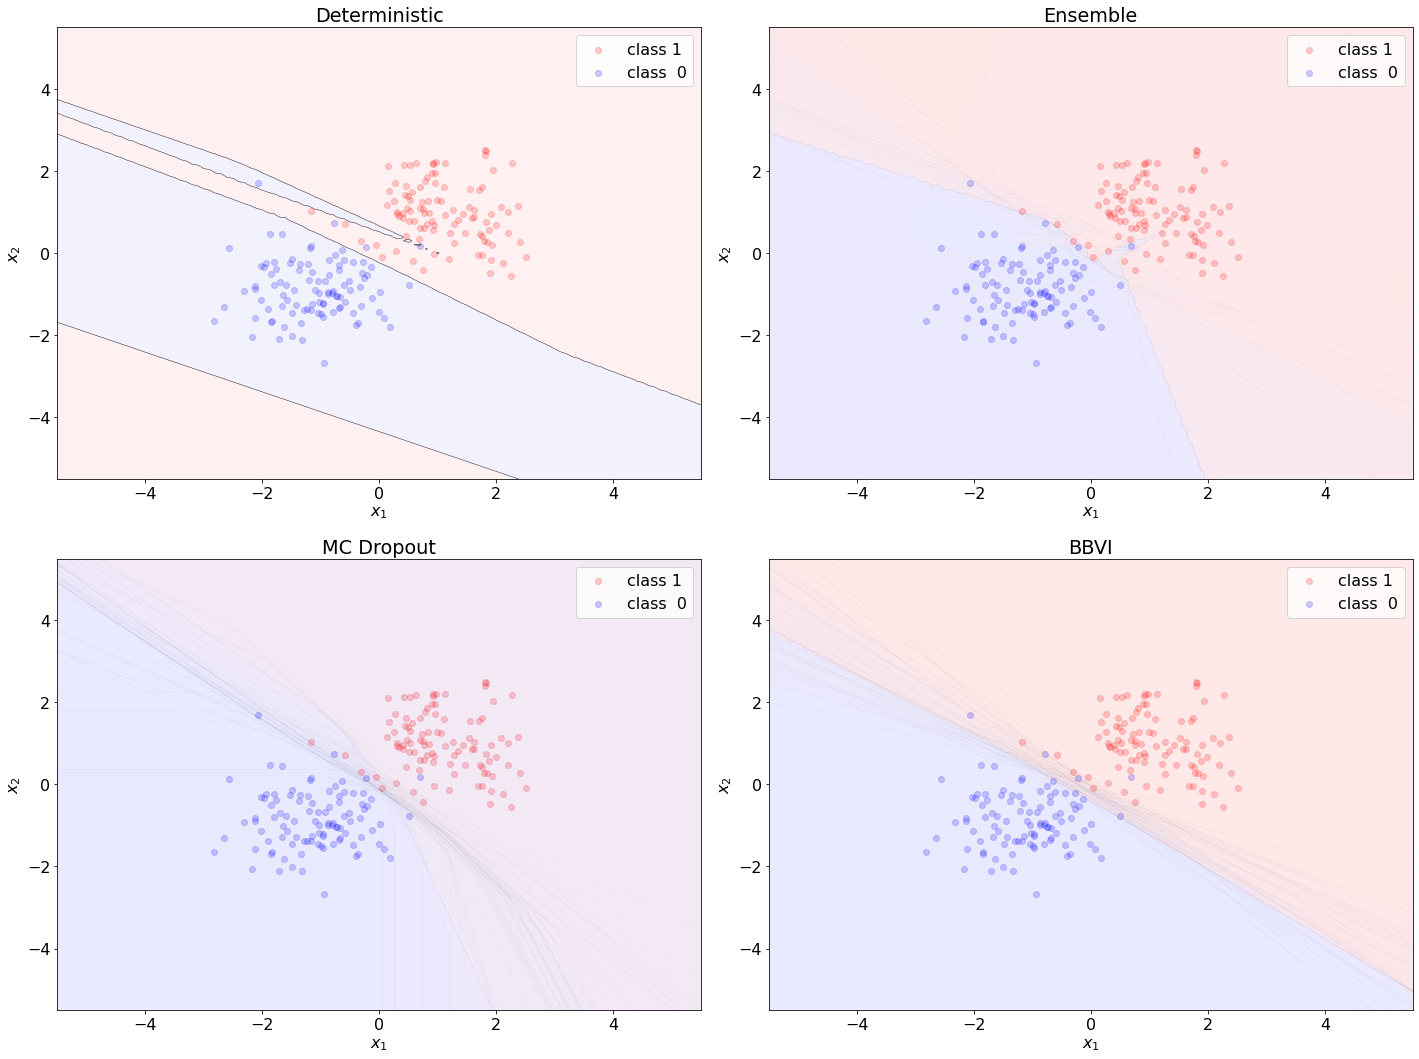

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
k = 0 
models = ['Deterministic', 'Ensemble', 'MC Dropout', 'BBVI']
for i in range(2):
    for j in range(2):
        
        ax[i][j].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
        ax[i][j].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class  0')
        if k == 0: 
            nn_here = [nn]
        elif k == 1: 
            nn_here = nn_all 
        elif k == 2: 
            nn_here = [nn_dropout]*100
        elif k == 3: 
            nn_here = nn_list
        plot_decision_boundary(x_train, y_train, nn_here, ax[i][j], poly_degree=1, shaded=True)
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].set_title(models[k])
        ax[i][j].legend(loc='best')
        k+= 1 
plt.tight_layout()
plt.show()

fig.savefig('./figures/Gaussian_decision_boundaries.png', dpi=fig.dpi)


## Entropy

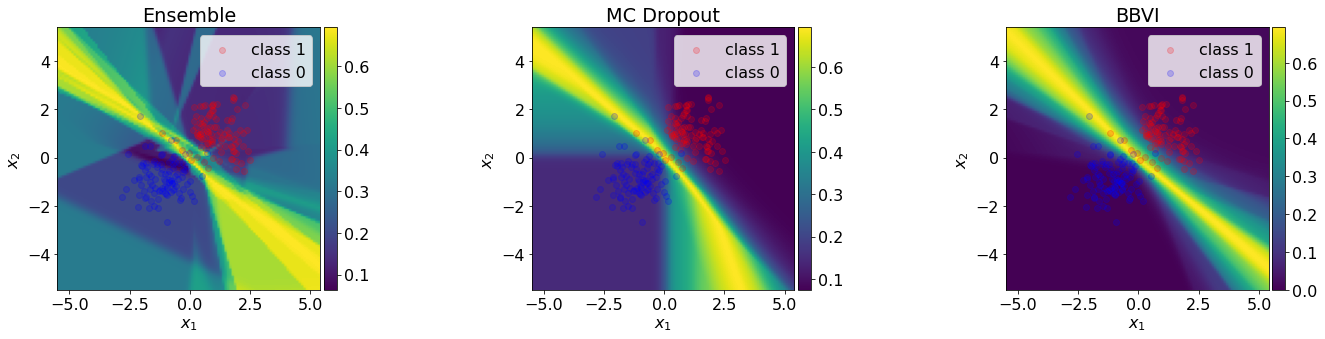

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
models = ['Ensemble', 'MC Dropout', 'BBVI']
for k in range(3):
    plt.rcParams.update({'font.size': 16})
    ax[k].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[k].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    if k == 0: 
        nn_here = nn_all 
        cl=plot_entropycontours(x_train, y_train, nn_here, w_bootstrap, ax[k], models[k], poly_degree=1, shaded=True)
    
    elif k == 1:
        nn_here = nn_dropout
        weights_here = [nn_dropout.weights]*50
        cl=plot_entropycontours(x_train, y_train, nn_here, weights_here, ax[k], models[k], poly_degree=1, shaded=True)

    elif k == 2: 
        nn_here = nn_list
        cl=plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax[k], models[k], poly_degree=1, shaded=True)
    
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(cl, cax=cax, orientation='vertical')
    ax[k].set_xlabel('$x_1$')
    ax[k].set_ylabel('$x_2$')
    ax[k].set_title(models[k])
    ax[k].legend(loc='best')
    
plt.tight_layout()
plt.show()

fig.savefig('./figures/Gaussian_entropy.png', dpi=fig.dpi)

## Accuracy vs. Referral Rate

In [ ]:
# define functions to calculate accuracy and referral rate

# old version 
# def accuracy(retain_perc, samples, n_run, N, x_test, y_test):
#     auc_dropout = np.zeros([len(retain_perc),N])
#     auc_det = np.zeros([len(retain_perc),N])
#     auc_ens = np.zeros([len(retain_perc),N])
#     auc_bbvi = np.zeros([len(retain_perc),N])
#     for (i, perc) in enumerate(retain_perc):
#         for j in range(N):
#             auc_dropout[i,j] = auc_calc(x_test, y_test, nn_dropout, N, perc, "mc")
#             posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
#             auc_bbvi[i,j] = auc_calc(x_test, y_test, nn, N, perc, "bbvi", weightlist=posterior_samples) #This code wont work from the module since its not being passed posterior_samples

#         auc_ens[i,:] = auc_calc(x_test, y_test, nn_all, 1, perc, "ensemble")

#         # use sigmoid probability for retaining data
#         auc_det[i,:] = auc_calc(x_test, y_test, nn, N, perc, "deterministic")

#     return auc_det, auc_ens, auc_dropout, auc_bbvi

def accuracy(retain_perc, N, x_test, y_test):
    dropout_num=50
    auc_dropout = np.zeros([len(retain_perc),dropout_num])
    auc_det = np.zeros([len(retain_perc),N])
    auc_ens = np.zeros([len(retain_perc),len(w_bootstrap)])
    auc_bbvi = np.zeros([len(retain_perc),len(posterior_samples)])
    for (i, perc) in enumerate(retain_perc):
        auc_dropout[i,:] = auc_calc_beta(x_test, y_test, nn_dropout, dropout_num, perc, "mc") #all x, 1 perc, all w
        #posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
        auc_bbvi[i,:] = auc_calc_beta(x_test, y_test, nn, N, perc, "bbvi", weightlist=posterior_samples)
        ensi = auc_calc_beta(x_test, y_test, nn, N, perc, "ensemble", weightlist=w_bootstrap)
        auc_ens[i,:] = ensi #Changed to N
        #print (ensi)
        # use sigmoid probability for retaining data
        auc_det[i,:] = auc_calc_beta(x_test, y_test, nn, N, perc, "deterministic")
    return auc_det, auc_ens, auc_dropout, auc_bbvi



def accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc):

    auc_dropout_ub = np.percentile(auc_dropout, 97.5, axis=1)
    auc_dropout_lb = np.percentile(auc_dropout, 2.5, axis=1)

    auc_ub_ens = np.percentile(auc_ens, 97.5, axis=1)
    auc_lb_ens = np.percentile(auc_ens, 2.5, axis=1)

    auc_ub_bbvi = np.percentile(auc_bbvi, 97.5, axis=1)
    auc_lb_bbvi = np.percentile(auc_bbvi, 2.5, axis=1)
    
    plt.rcParams.update({'font.size': 16})
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    ax[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[0].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    ax[0].scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], alpha=0.8, c='red', label='test class 1')
    ax[0].scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], alpha=0.8, c='blue', label='test class 0')
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')
    ax[0].legend()
    ax[0].set_title('Visualization of training and test sets')
    ax[1].fill_between(retain_perc, auc_dropout_ub, auc_dropout_lb, color='blue', alpha=0.2)
    ax[1].plot(retain_perc, np.mean(auc_dropout,axis=1), 'blue', label='MC dropout')
    ax[1].plot(retain_perc, np.mean(auc_ens,axis=1), 'red', label='Ensemble')
    ax[1].plot(retain_perc, np.mean(auc_bbvi,axis=1), 'purple', label='BBVI')
    ax[1].plot(retain_perc, np.mean(auc_det,axis=1), 'green', label='Deterministic')
    ax[1].fill_between(retain_perc, auc_ub_bbvi, auc_lb_bbvi, color='purple', alpha=0.2)
    ax[1].fill_between(retain_perc, auc_ub_ens, auc_lb_ens, color='red', alpha=0.2)
    ax[1].set_xlabel("Retained Data")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Accuracy of different models")
    ax[1].set_xlim((min(retain_perc), max(retain_perc)))
#     ax[1].set_ylim((30, 90))
    ax[1].legend()
    plt.show()


In [ ]:
# Accuracy vs referral rate 
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 100

x_test, y_test = make_blobs(center1, center2, spread1, spread2, n_samples)

retain_perc = np.linspace(0.2, 1, 10)

auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, samples, n_run, N, x_test, y_test)

accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc)

fig.savefig('./figures/Gaussian_accuracy.png', dpi=fig.dpi)

/opt/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/venv/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


KeyboardInterrupt: 

## Experiment 2

In this experiment, our aim is to understand how the different models under
consideration perform on test points that are placed far from the high confidence
part of the decision boundaries. In particular, how well does the uncertainty captured by
each of the models indicate when test points are out of distribution. These engineered 
situations allow us to probe the epistemic uncertainty of the models in regions where 
little to no training data has been seen. Within this context, we test on toy datasets the
claim that the uncertainty metrics proposed in this work are sufficient for identifying 
when models give good uncertainty on out of distribution points, as well as the claim that
MC dropout performs best on real life data.

### The Data Sets

We will consider two test beds for this experiment. First, we will consider points
belonging spacially to two different Gaussian distributions (which we will refer to as
the Gaussian blobs dataset), each with its own class label. Below, we visualize such a 
training set, along with our out of distribution test points in black. 

In [ ]:
# Generate a toy dataset for classification (Gaussian Blobs)
samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_train = np.vstack((class_0, class_1))
y_train = np.array([0] * 100 + [1] * 100)

# generate test points, include some of original training distribution
test_points, test_points_labels = generate_exp1_test_data()

plot_training_data(x_train, y_train, samples, test=test_points)

The second data set that we'll consider is the crescent moon classification data set.
Again, we can visualize the training set and the test points below.

In [ ]:
# Generate a toy dataset for classification (Gaussian Blobs)
x_moon, y_moon = make_moons(n_samples=2*samples, shuffle=False, noise=0.1, random_state=None)

# generate test points
test_points_moons, test_points_labels_moons = generate_exp1_test_data_moons()

plot_training_data(x_moon, y_moon, samples, test=test_points_moons)

NameError: name 'samples' is not defined

### Training the Models

Now that we've defined our training and test sets, we can train our models. We will
start with a determinstic neural network model, who's parameters will be used to set
the architecture of more complex models. After experimenting with performance, the 
parameters used below were found to be best. 

#### A Deterministic Neural Network Model

##### Training for Gaussian Blobs

In [ ]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu' #'leaky_relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x) #np.maximum(np.ones(x.shape)*1e-3, x) #WARNING: CHANGED THIS TO LEAKY RELU

###neural network model design choices
width = 4
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [ ]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

##### Training for Crescent Moons

In [ ]:
###neural network model design choices
width = 5
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture_moons = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#instantiate a Feedforward neural network object
nn_moons = Feedforward(architecture_moons, random=random)

In [ ]:
nn_moons.fit(x_moon.T, y_moon.reshape((1,-1)), params, reg_param = 0.0002)

### Deep Ensemble Neural Networks

Using the same architecture as the deterministic network, we can randomly initialize
the weights in new states to generate an ensemble of neural network models. Below, we
construct an ensemble consisting of 20 samples.

#### Training for Gaussian Blobs

In [ ]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20

# load existing data
if os.path.exists('data/exp1_deep_ensemble0.pkl'):
    w_bootstrap = [] 
    nn_all = []
    for i in range(N_bootstrap):
        weights_here = pickle.load(open("data/exp1_deep_ensemble" + str(i) + ".pkl", "rb"))
        w_bootstrap.append(weights_here)

        #set random state to make the experiments replicable
        rand_state = 0
        random = np.random.RandomState(rand_state)
        nn_here = Feedforward(architecture, random=random)
        nn_here.weights = weights_here
        nn_all.append(nn_here)

# if no existing data, do a new run
else: 
    nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)
    
    # save data 
    masterdir = os.getcwd()
    for (i,nn_temp) in enumerate(nn_all):
        with open('data/exp1_deep_ensemble' + str(i) + '.pkl', 'wb') as f:
            pickle.dump(nn_temp.weights, f, pickle.HIGHEST_PROTOCOL)

##### Training for Crescent Moons

In [ ]:
random = np.random.RandomState(rand_state)

# load existing data
if os.path.exists('data/exp1_moons_deep_ensemble0.pkl'):
    w_bootstrap_moons = [] 
    nn_all_moons = []
    for i in range(N_bootstrap):
        weights_here = pickle.load(open("data/exp1_moons_deep_ensemble" + str(i) + ".pkl", "rb"))
        w_bootstrap_moons.append(weights_here)

        #set random state to make the experiments replicable
        rand_state = 0
        random = np.random.RandomState(rand_state)
        nn_here = Feedforward(architecture_moons, random=random)
        nn_here.weights = weights_here
        nn_all_moons.append(nn_here)

# if no existing data, do a new run
else: 
    nn_all_moons, w_bootstrap_moons = ensemble(x_moon, y_moon, Feedforward, architecture_moons, params, random, N_bootstrap, reg_param)
    
    # save data 
    masterdir = os.getcwd()
    for (i,nn_temp) in enumerate(nn_all_moons):
        with open('data/exp1_moons_deep_ensemble' + str(i) + '.pkl', 'wb') as f:
            pickle.dump(nn_temp.weights, f, pickle.HIGHEST_PROTOCOL)

#### Monte Carlo (MC) Dropout

Rather than intializing the weights in new random states for every training pass,
we can perform MC dropout where each weight in the network has a non-zero probability
of being set to zero for each pass through the network (both during training and at
inference). Below, we train a network using MC dropout, and when we make predictions 
later on, we will generate an ensemble of predictions by randomly selecting weights to
zero out some $N$ number of times.

##### Training for Gaussian Blobs

In [ ]:
# MC dropout

# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 4
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}


#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

##### Training for Crescent Moons

In [ ]:
rand_state = 0
random = np.random.RandomState(rand_state)

width = 5
hidden_layers = 3
input_dim = x_moon.shape[1]
output_dim = 1

architecture_dropout_moons = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.01,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#instantiate a Feedforward neural network object
nn_dropout_moons = Feedforward_Dropout(architecture_dropout_moons, random=random)

params = {'step_size':1e-3, 
          'max_iteration':15000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
nn_dropout_moons.fit(x_moon.T, y_moon.reshape((1,-1)), params, reg_param = .001)

#### Mean Field Variational Inference (MFVI)

To perform variational inference, we will use the parameters of the deterministic
neural network model as the starting guess for the means of the distributions of each
weight. 

##### Training for Gaussian Blobs

In [ ]:
## BBVI

S = 20
max_iteration = 10000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*25
sigma_y = 1

# load existing data
if os.path.exists('data/exp1_bbvi.pkl'):

    variational_params = pickle.load(open("data/exp1_bbvi.pkl", "rb"))
    
    var_means = variational_params[0:nn.D]
    var_variance = np.exp(variational_params[nn.D:])**2

# if no existing data, do a new run
else: 
    variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)

    var_means = variational_params[0:nn.D]
    var_variance = np.exp(variational_params[nn.D:])**2
    
    with open('data/exp1_bbvi.pkl', 'wb') as f:
        pickle.dump(variational_params, f, pickle.HIGHEST_PROTOCOL)

##### Training for Crescent Moons

In [ ]:
Sigma_W = np.eye(nn_moons.D)*25
sigma_y = 1


# load existing data
if os.path.exists('data/exp1_moons_bbvi.pkl'):

    variational_params_moons = pickle.load(open("data/exp1_moons_bbvi.pkl", "rb"))
    
    var_means_moons = variational_params_moons[0:nn_moons.D]
    var_variance_moons = np.exp(variational_params_moons[nn_moons.D:])**2

# if no existing data, do a new run
else: 
    variational_params_moons = variational_inference(Sigma_W, sigma_y, y_moon, x_moon.T, nn_moons, nn_moons.forward, S, max_iteration, step_size, 1)

    var_means_moons = variational_params_moons[0:nn_moons.D]
    var_variance_moons = np.exp(variational_params_moons[nn_moons.D:])**2
    
    with open('data/exp1_moons_bbvi.pkl', 'wb') as f:
        pickle.dump(variational_params_moons, f, pickle.HIGHEST_PROTOCOL)

### Visualizing Decision Boundaries

In [ ]:
# generate lists of neural networks for plotting BBVI
posterior_sample_size = 100
nn_list = []
nn_list_moons = []
for i in range(posterior_sample_size):
    #set random state to make the experiments replicable
    rand_state = 0
    random = np.random.RandomState(rand_state)

    tempNN = Feedforward(architecture, random=random)
    tempNN_moons = Feedforward(architecture_moons, random=random)

    tempNN.weights = np.random.multivariate_normal(var_means, np.diag(var_variance)).reshape((1,var_means.shape[0]))
    tempNN_moons.weights = np.random.multivariate_normal(var_means_moons, np.diag(var_variance_moons)).reshape((1,var_means_moons.shape[0]))

    nn_list.append(tempNN)
    nn_list_moons.append(tempNN_moons)

#### PLOT

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
k = 0 
models = ['Deterministic', 'Ensemble', 'MC Dropout', 'BBVI']
for i in range(2):
    for j in range(2):
        
        ax[i][j].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
        ax[i][j].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class  0')
        if k == 0: 
            nn_here = [nn]
        elif k == 1: 
            nn_here = nn_all 
        elif k == 2: 
            nn_here = [nn_dropout]*100
        elif k == 3: 
            nn_here = nn_list
        plot_decision_boundary(x_train, y_train, nn_here, ax[i][j], poly_degree=1, test_points=test_points, shaded=True)
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].set_title(models[k])
        ax[i][j].legend(loc='best')
        k+= 1 
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
k = 0 
for i in range(2):
    for j in range(2):
        
        ax[i][j].scatter(x_moon[y_moon == 1, 0], x_moon[y_moon == 1, 1], alpha=0.2, c='red', label='class 1')
        ax[i][j].scatter(x_moon[y_moon == 0, 0], x_moon[y_moon == 0, 1], alpha=0.2, c='blue', label='class  0')
        if k == 0: 
            nn_here = [nn_moons]
        elif k == 1: 
            nn_here = nn_all_moons 
        elif k == 2: 
            nn_here = [nn_dropout_moons]*100
        elif k == 3: 
            nn_here = nn_list_moons
        plot_decision_boundary(x_moon, y_moon, nn_here, ax[i][j], poly_degree=1, test_points=test_points_moons, shaded=True)
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].set_title(models[k])
        ax[i][j].legend(loc='best')
        k+= 1 
plt.tight_layout()
plt.show()

### Accuracy Versus Referral Rate

#### Gaussian Blobs

In [ ]:
# uncertainty metric
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 20

posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)

retain_perc = np.linspace(0.2, 1, 10)

auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, samples, n_run, N, test_points, test_points_labels)

accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, test_points, test_points_labels, retain_perc)


#### Crescent Moons

In [ ]:
# uncertainty metric
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 20

posterior_samples_moons = np.random.multivariate_normal(var_means_moons, np.diag(var_variance_moons), size=posterior_sample_size)

auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, samples, n_run, N, test_points_moons, test_points_moons)

accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_moon, y_moon, test_points_moons, test_points_labels_moons, retain_perc)


### Entropy

#### Gaussian Blobs

In [ ]:
# PLOT ENTROPY FOR GAUSSIAN BLOBS

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
models = ['Ensemble', 'MC Dropout', 'BBVI']
for k in range(3):
    plt.rcParams.update({'font.size': 16})
    ax[k].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[k].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    if k == 0: 
        nn_here = nn_all 
        cl=plot_entropycontours(x_train, y_train, nn_here, w_bootstrap, ax[k], models[k], poly_degree=1, shaded=True)
    
    elif k == 1: 
        nn_here = [nn_dropout]
        weights_here = [nn_dropout.weights]*50
        cl=plot_entropycontours(x_train, y_train, nn_here, weights_here, ax[k], models[k], poly_degree=1, shaded=True)

    elif k == 2: 
        nn_here = nn_list
        cl=plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax[k], models[k], poly_degree=1, shaded=True)
    
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(cl, cax=cax, orientation='vertical');
    ax[k].set_xlabel('$x_1$')
    ax[k].set_ylabel('$x_2$')
    ax[k].set_title(models[k])
    ax[k].legend(loc='best')
    
plt.tight_layout()
plt.show()

#### Crescent Moons

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for k in range(3):
    plt.rcParams.update({'font.size': 16})
    ax[k].scatter(x_moon[y_moon == 1, 0], x_moon[y_moon == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[k].scatter(x_moon[y_moon == 0, 0], x_moon[y_moon == 0, 1], alpha=0.2, c='blue', label='class 0')
    if k == 0: 
        nn_here = nn_all_moons 
        cl=plot_entropycontours(x_moon, y_moon, nn_here, w_bootstrap_moons, ax[k], models[k], poly_degree=1, shaded=True)
    
    elif k == 1: 
        nn_here = [nn_dropout_moons]
        weights_here = [nn_dropout_moons.weights]*50
        cl=plot_entropycontours(x_moon, y_moon, nn_here, weights_here, ax[k], models[k], poly_degree=1, shaded=True)

    elif k == 2: 
        nn_here = nn_list_moons
        cl=plot_entropycontours(x_moon, y_moon, nn_moons, [posterior_samples_moons[i].reshape((1, -1)) for i in range(posterior_samples_moons.shape[0])], ax[k], models[k], poly_degree=1, shaded=True)
    
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(cl, cax=cax, orientation='vertical');
    ax[k].set_xlabel('$x_1$')
    ax[k].set_ylabel('$x_2$')
    ax[k].set_title(models[k])
    ax[k].legend(loc='best')
    
plt.tight_layout()
plt.show()

### Analysis

In our analysis, we wish to understand two things. First, we want to determine whether
the proposed uncertainty metric is indeed sufficient to identify whether any given model 
provides robust uncertainty quantification. That is, are we able to tell whether a model
is giving reasonable uncertainties? The second aspect we want to probe is the claim that
MC drop out performs the best on real life data.

To the first point, we notice immediately the decision boundaries predicted for both 
of the training sets. It's clear that all models for the Gaussian blobs training set,
other than the deterministic neural network, provide varying degrees of uncertainty 
about the decision boundary. However, we note that the variation in the decision 
boundaries is localized to what we might identify as a direction parallel to the sharp
boundary between the training points. On the other hand, there is no variation at all
in the boundaries as we move in the other direction (i.e. where we have placed our test
points). This is problematic because it suggests that all of our models will give poor
uncertainty on these points that are out of distribution.

A similar effect is seen for the crescent moon training set. While moving away from the
training points along the deterministic decision boundary, the uncertainty increases. 
However, looking directly above or below the moons as in our test set, the uncertainty is
nearly zero. 

If we construct accuracy curves for these models and test sets as a function of retained
test points, this provides some support that the proposed uncertainty metric does in fact indicate that the
models we have poorly capture uncertainty on all out of distribution points (although
we will further probe this point in other experiments). As we move
to the left along the x-axis, we retain less data in our test set. However, in all cases,
the accuracy goes down when we do this. This indicates that the model is uncertainty
about things that it should be certain about, and it is certain about things it should 
be uncertain about. 

In the context of our specific test sets, we have included some training points that are
in distribution. These points actually lie closer to the decision boundary, and the model
has increased uncertainty on these than on the other test points that it believes lie
deep within either classification region. Because we have made these out of distribution
points have random classifications to simulate the effect of unknown data on predictions,
the accuracy of our model goes down as it retains less data and gets rid of the points
where it should actually be more certain. 

These trends persist in the entropy plots. The high entropy regions spread out from the 
data along where the models believe the decision boundary should be. However, it does
not account for more complicated possible boundaries that loop around the clusters of 
training data. As a result, the entropy is quite low in these regions, indicating the 
models are confident where they should not be.

While this experiment supports the use of the proposed uncertainty metric, it does not
explain the benefit of MC dropout to real life data. With even a very simple test case,
we see that MC dropout is not capable of giving good uncertainty quantification on out of
distribution points. It could be that more complex networks allow more flexibility of 
possible decision boundaries for which the uncertainty outside of the training set might
go up. 


# Experiment 3: class overlap 
In this experiment, we generate toy training datasets consisted of two Gaussian blobs (class 0 and class 1) with some overalp. 
We test the performance of the four baselines for this model by the visualizing the decision boundaries, entropy, and accuracy vs. referral rate. 
We also test the model performance with test sets with different distributions from the training set and compare and contrast with the case without a distribution shift.

## Training

In [ ]:
# Create training set with some overlap 
center1 = [-0.2, -0.2]
center2 = [0.2, 0.2]
spread1 = 0.5
spread2 = 0.5
n_samples = 100

x_train, y_train = make_blobs(center1, center2, spread1, spread2, n_samples)

### Deterministic Model

In [ ]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

###neural network model design choices
width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [ ]:
###define design choices in gradient descent
params = {'step_size':1e-4, 
          'max_iteration':20000, 
          'random_restarts':1, 
          'check_point':500}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0005)

### Deep Ensemble

In [ ]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20

# load existing data
if os.path.exists('data/deep_ensemble0.pkl'):
    w_bootstrap = [] 
    nn_all = []
    for i in range(N_bootstrap):
        weights_here = pickle.load(open("data/deep_ensemble" + str(i) + ".pkl", "rb"))
        w_bootstrap.append(weights_here)

        #set random state to make the experiments replicable
        rand_state = 0
        random = np.random.RandomState(rand_state)
        nn_here = Feedforward(architecture, random=random)
        nn_here.weights = weights_here
        nn_all.append(nn_here)

# if no existing data, do a new run
else: 
    nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)
    
    # save data 
    masterdir = os.getcwd()
    for (i,nn) in enumerate(nn_all):
        with open('data/deep_ensemble' + str(i) + '.pkl', 'wb') as f:
            pickle.dump(nn.weights, f, pickle.HIGHEST_PROTOCOL)

ValueError: unsupported pickle protocol: 5

### MC Dropout

In [ ]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 1005.005048281761; gradient mag: 1407.1837716929635
Iteration 500 lower bound 77.15656286620782; gradient mag: 83.49451760962587
Iteration 1000 lower bound 104.9644238519354; gradient mag: 90.48515762383263
Iteration 1500 lower bound 59.62313975354735; gradient mag: 22.331928832645417
Iteration 2000 lower bound 19.322642052490753; gradient mag: 28.803602397618953
Iteration 2500 lower bound 17.440611003431936; gradient mag: 12.65918523939993
Iteration 3000 lower bound 29.18604332192644; gradient mag: 30.967283047018924
Iteration 3500 lower bound 21.420325150297188; gradient mag: 42.15613137409536
Iteration 4000 lower bound 10.814592711291713; gradient mag: 13.524497321987285
Iteration 4500 lower bound 11.535856323605135; gradient mag: 21.32613855273272
Iteration 5000 lower bound 16.716304083350675; gradient mag: 18.851996711111006
Iteration 5500 lower bound 20.52779995349153; gradient mag: 94.81489419251349
Iteration 6000 lower bound 13.005285763810107; gradient 

### MFVI

In [ ]:
S = 20
max_iteration = 10000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*5
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)

Optimizing variational parameters...
Iteration 0 lower bound -1611.7956903739882; gradient mag: 1607.7981906216155
Iteration 100 lower bound -1042.269156040815; gradient mag: 1083.6144730057574
Iteration 200 lower bound -703.0070467278044; gradient mag: 347.88654756133843
Iteration 300 lower bound -649.809839032348; gradient mag: 141.88918416950276
Iteration 400 lower bound -628.6546326357654; gradient mag: 84.0166796100622
Iteration 500 lower bound -614.0120313595984; gradient mag: 71.07453778476545
Iteration 600 lower bound -601.1744770533013; gradient mag: 70.79632309800309
Iteration 700 lower bound -586.9567445994124; gradient mag: 65.40647339152703
Iteration 800 lower bound -574.9322927790547; gradient mag: 50.813160963675415
Iteration 900 lower bound -565.4427247482481; gradient mag: 40.15149050391304
Iteration 1000 lower bound -557.0011546082137; gradient mag: 31.952157874647792
Iteration 1100 lower bound -549.0962294958606; gradient mag: 27.479317932235386
Iteration 1200 lower 

In [ ]:
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2

x_test, y_test = make_blobs(center1, center2, spread1, spread2, n_samples)
posterior_sample_size = 100
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T)
y_predict_noiseless = np.squeeze(y_predict_noiseless)

nn_list = []
for i in range(posterior_sample_size):
    #set random state to make the experiments replicable
    rand_state = 0
    random = np.random.RandomState(rand_state)
    tempNN = Feedforward(architecture, random=random)
    tempNN.weights = np.random.multivariate_normal(var_means, np.diag(var_variance)).reshape((1,var_means.shape[0]))
    nn_list.append(tempNN)

### Decision Boundary

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
k = 0 
models = ['Deterministic', 'Ensemble', 'MC Dropout', 'BBVI']
for i in range(2):
    for j in range(2):
        
        ax[i][j].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
        ax[i][j].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class  0')
        if k == 0: 
            nn_here = [nn]
        elif k == 1: 
            nn_here = nn_all 
        elif k == 2: 
            nn_here = [nn_dropout]*100
        elif k == 3: 
            nn_here = nn_list
        plot_decision_boundary(x_train, y_train, nn_here, ax[i][j], poly_degree=1, shaded=True)
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].set_title(models[k])
        ax[i][j].legend(loc='best')
        k+= 1 
plt.tight_layout()
plt.show()
fig.savefig('./figures/overlap_decision_boundary.png', dpi=fig.dpi)

### Entropy

In [ ]:
 
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
models = ['Ensemble', 'MC Dropout', 'BBVI']
for k in range(3):
    plt.rcParams.update({'font.size': 16})
    ax[k].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[k].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    if k == 0: 
        nn_here = nn_all 
        cl=plot_entropycontours(x_train, y_train, nn_here, w_bootstrap, ax[k], models[k], poly_degree=1, shaded=True)
    
    elif k == 1:
        nn_here = nn_dropout
        weights_here = [nn_dropout.weights]*50
        cl=plot_entropycontours(x_train, y_train, nn_here, weights_here, ax[k], models[k], poly_degree=1, shaded=True)

    elif k == 2: 
        nn_here = nn_list
        cl=plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax[k], models[k], poly_degree=1, shaded=True)
    
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(cl, cax=cax, orientation='vertical')
    ax[k].set_xlabel('$x_1$')
    ax[k].set_ylabel('$x_2$')
    ax[k].set_title(models[k])
    ax[k].legend(loc='best')
    
plt.tight_layout()
plt.show()
fig.savefig('./figures/overlap_entropy.png', dpi=fig.dpi)

## Accuracy vs. Referral Rate
### Test dataset 1: class overlap with no distribution shift

Note that the accuracy decreases compared to Experiment 1. This is also expected - when the two classes overlap significantly, the prediction should be less accurate. 
However, the accuracy still decreases as the retained data increases. This shows that the uncertainty metric (entropy for non-deterministic models and sigmoid probability) is effective in improving the accuracy rate when the uncertain data is being referred to experts. 

In [ ]:
# Accuracy vs referral rate 
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 100

x_test, y_test = make_blobs(center1, center2, spread1, spread2, n_samples)

retain_perc = np.linspace(0.2, 1, 10)

auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, samples, n_run, N, x_test, y_test)

In [ ]:
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc)
fig.savefig('./figures/overlap_accuracy_test1.png', dpi=fig.dpi)

### Test dataset 2: small class overlap with a small distribution shift
In this test dataset, we mix a part of the original distribution with two additional Gaussian blobs that are further apart and centered at (1, 1) and (-1, -1). 
There is a distribution shift compared to the original training data. 

In [ ]:
# distribution shift # 1
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 100

# less overlap
c = 1
c1 = [c, c]
c2 = [-c, -c]
s1 = 0.5 
s2 = 0.5


x_test1, y_test1 = make_blobs(c1, c2, s1, s2, n_samples)
x_test2, y_test2 = make_blobs(center1, center2, spread1, spread2, n_samples)
x_test = np.vstack((x_test1, x_test2))
y_test = np.concatenate((y_test1, y_test2))

# Accuracy vs referral rate 
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 100

retain_perc = np.linspace(0.2, 1, 10)
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_test1, y_test1)

In [ ]:
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc)
fig.savefig('./figures/overlap_accuracy_test2.png', dpi=fig.dpi)

### Test dataset 3: small class overlap large distribution shift
In this case, we mix two Gaussian blobs centered at (2, -2) and (-2, 2) with the two original Guassian blobs. 
The two added Gaussian blobs are centered at different quadrants than the training sets. 
Therefore, ideally, the models should predict a high uncertainty for these test points.
Equivalently, the accuracy vs. retained data plot should be flat if the proposed uncertainty metric is capable of distinguishing out-of-distribution test data.

In [ ]:
# distribution shift #2
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 100

# less overlap
c = 2
c1 = [c, -c]
c2 = [-c, c]
s1 = 0.5 
s2 = 0.5

x_test1, y_test1 = make_blobs(c1, c2, s1, s2, n_samples)

x_test2, y_test2 = make_blobs(center1, center2, spread1, spread2, n_samples)
x_test = np.vstack((x_test1, x_test2))
y_test = np.concatenate((y_test1, y_test2))

# Accuracy vs referral rate 
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 100


retain_perc = np.linspace(0.2, 1, 10)
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_test, y_test)

In [ ]:
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc)
fig.savefig('./figures/overlap_accuracy_test3.png', dpi=fig.dpi)

### Test data 4: large class overlap and no distribution shift
Here we include two additional overlapping Gaussian blobs in additional to the two original ones. 
Since the two additional Gaussian blobs overlap with each other completely, we should expect the uncertainty to be very high.
If the proposed uncertainty metric is indeed capable of capturing this distribution shift, we should expect a small accuracy and flat accuracy curve across all retained data, because the model should be unconfident about the prediction everywhere. 

In [ ]:
# distribution shift #3
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 100

# less overlap
c = 0.
c1 = [c, -c]
c2 = [-c, c]
s1 = 0.5 
s2 = 0.5

x_test1, y_test1 = make_blobs(c1, c2, s1, s2, n_samples)

x_test2, y_test2 = make_blobs(center1, center2, spread1, spread2, n_samples)
x_test = np.vstack((x_test1, x_test2))
y_test = np.concatenate((y_test1, y_test2))

retain_perc = np.linspace(0.2, 1, 10)
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_test, y_test)

In [ ]:
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc)
fig.savefig('./figures/overlap_accuracy_test4.png', dpi=fig.dpi)

## Analysis 
From this experiment, we observe that the decision boundaries have a wider distribution and the entropy is high in a larger region in the data-sparse region compared to the Gaussian blob example. This is expected because when  the classes have a significant overlap, the uncertainty should be high. However, we still observe that not all data-sparse regions have a high entropy. This could be due to the fact that the network is not complex enough to capture the proper shape of the decision boundary. 

When we test the uncertainty metrics using the accuracy vs. referral rate plot, we observe that for a test set that resembles the original training data, the performance is similar to the Gaussian blobs despite the accuracy being lower overall. The accuracy increases as more uncertain predictions being referred to the expert, as expected.  

As we include distribution shifts in the test datasets (test sets 2 - 4), the performances of the baselines change. We can make the two following observations: 
1. The greater the degree of class overlap, the poorer the model performance and accuracy. In test set 2, we include two additional Gaussian blobs centered at (1, 1) and (-1, -1) respectively in addition to the two blobs centered at (0.2, 0.2) and (-0.2, -0.2). This case has a higher accuracy compared to test set 1.  
2. The greater the degree of distribution ship, the poorer the model performance and accuracy. In test set 4, we include two additional completely overlapping Gaussian blobs and they should be indistinguishable. In this case, the accuracy is much lower, and the accuracy vs. retained data curves are much flatter compared to the previous cases. 

From these two observations, we may conclude that the uncertainty metric is capable to detecting distribution shift and out of distribution test data to some degree, based on the change in the accuracy curve shape and magnitude. However, there are cases when the metric fails. For example, in test set 3, when the class overlap of the test dataset is smaller compared to the original dataset, and the centers of the two additional Gaussian blobs are drastically different compared to the original distributions, the uncertainty metric still suggests that the model predictions are reasonable. In this case, the metric fails to capture the distribution shift. This is due to the fact that the two additional Guassian blobs are located in the low-entropy data-sparse regions. This suggests that the metric is not capable of capturing the eleatoric uncertainty. 

Finally, this experiment is inconclusive about which baseline has a better performance. According to Filos et al., the steeper the accuracy vs. retained data slope, the more desirable it is. However, the performance of different models depends on the details of the test data. 

# Experiment 4: Outliers in the Training Distribution


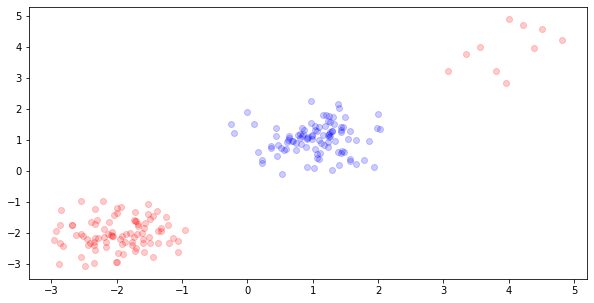

In [ ]:
def generate_3blobs(n_train, centers, std):
    neach = int(n_train/2)
    rng = np.random.default_rng()
    blob1 = rng.normal(loc=centers[0], scale = std, size=int(neach-10)*2).reshape((-1, 2))
    blob2 = rng.normal(loc=centers[1], scale=std, size=neach*2).reshape((-1, 2))
    blob3 = rng.normal(loc=centers[2], scale=std, size=10*2).reshape((-1, 2))
    #print (blob1.shape, blob3.shape)
    x = np.vstack([blob1, blob2, blob3])
    y = np.asarray([1]*(neach-10)+[0]*neach+[1]*10)
    return x, y

x_train, y_train = generate_3blobs(200, [-2.0, 1.0, 4.0], std=0.5)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plt.show()

## Training
### Deterministic

In [ ]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu' #'leaky_relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x) #np.maximum(np.ones(x.shape)*1e-3, x) #WARNING: CHANGED THIS TO LEAKY RELU

###neural network model design choices
width = 4 
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

Iteration 0 lower bound 642.1059294672085; gradient mag: 816.5793839659424
Iteration 500 lower bound 103.80111491601329; gradient mag: 48.07886173889549
Iteration 1000 lower bound 64.24994831362781; gradient mag: 65.8531380305382
Iteration 1500 lower bound 32.78200917126485; gradient mag: 27.26568788974366
Iteration 2000 lower bound 23.18466494467345; gradient mag: 22.442726963431102
Iteration 2500 lower bound 17.055092965450797; gradient mag: 17.89794533356225
Iteration 3000 lower bound 12.85174579720625; gradient mag: 12.14078918437354
Iteration 3500 lower bound 9.853859836067766; gradient mag: 11.53312582108395
Iteration 4000 lower bound 7.65373139947835; gradient mag: 7.3923033581684185
Iteration 4500 lower bound 6.003567213164704; gradient mag: 5.842175089282066
Iteration 5000 lower bound 4.744717115365524; gradient mag: 4.64249485050161
Iteration 5500 lower bound 3.772102094367138; gradient mag: 5.037539888806348
Iteration 6000 lower bound 3.0125006066393323; gradient mag: 2.9706

### Deep Ensembles

In [ ]:
#Loading pretrained weights
fname = 'data/outliers_wbootstrap.pkl'
w_bootstrap = pickle.load(open(fname, 'rb'))
nn_all = []
for r in range(len(w_bootstrap)):
    mod = Feedforward(architecture, random)
    mod.weights = w_bootstrap[r]
    nn_all.append(mod)

### Dropout

In [ ]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}


#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 780.0392608090683; gradient mag: 812.3242511999941
Iteration 500 lower bound 170.55484136528395; gradient mag: 233.25027661304375
Iteration 1000 lower bound 142.66256202178067; gradient mag: 93.38023135313998
Iteration 1500 lower bound 120.70247165114601; gradient mag: 76.4003462637147
Iteration 2000 lower bound 121.04227882138545; gradient mag: 262.51994921024357
Iteration 2500 lower bound 74.19689000413973; gradient mag: 97.95403086461063
Iteration 3000 lower bound 152.92042966941787; gradient mag: 144.21194583066324
Iteration 3500 lower bound 162.56706003481466; gradient mag: 40.91014954203082
Iteration 4000 lower bound 81.55841587675323; gradient mag: 67.18913513760079
Iteration 4500 lower bound 50.088040980803925; gradient mag: 225.628513138575
Iteration 5000 lower bound 98.39927813095085; gradient mag: 416.7148824282145
Iteration 5500 lower bound 44.87351614174009; gradient mag: 94.93916559179029
Iteration 6000 lower bound 108.77944840950666; gradient mag:

### MFVI

In [ ]:
S = 20
max_iteration = 10000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*25
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2

posterior_sample_size = 20
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)


Optimizing variational parameters...
Iteration 0 lower bound -635.5830730979687; gradient mag: 7.561913823809495
Iteration 100 lower bound -629.6679376909688; gradient mag: 7.5598166876440684
Iteration 200 lower bound -623.794596751803; gradient mag: 7.558425460951771
Iteration 300 lower bound -617.9480155818002; gradient mag: 7.557271053076642
Iteration 400 lower bound -612.1259562219134; gradient mag: 7.556250993674015
Iteration 500 lower bound -606.3203753685555; gradient mag: 7.555548111064898
Iteration 600 lower bound -600.5271527490729; gradient mag: 7.554972038350149
Iteration 700 lower bound -594.7434417701318; gradient mag: 7.554524863539573
Iteration 800 lower bound -588.9678366061927; gradient mag: 7.554046718134758
Iteration 900 lower bound -583.1994804319404; gradient mag: 7.553687641915846
Iteration 1000 lower bound -577.437681048827; gradient mag: 7.553335552866978
Iteration 1100 lower bound -571.6818590035491; gradient mag: 7.553011679266772
Iteration 1200 lower bound -

In [ ]:
modsvi=[]
for i in range(posterior_sample_size):
    newmod = Feedforward(architecture=architecture, random=random)
    newmod.weights = posterior_samples[i].reshape((1, -1))
    modsvi.append(newmod)

## Visualizing Decision Boundaries and Entropy

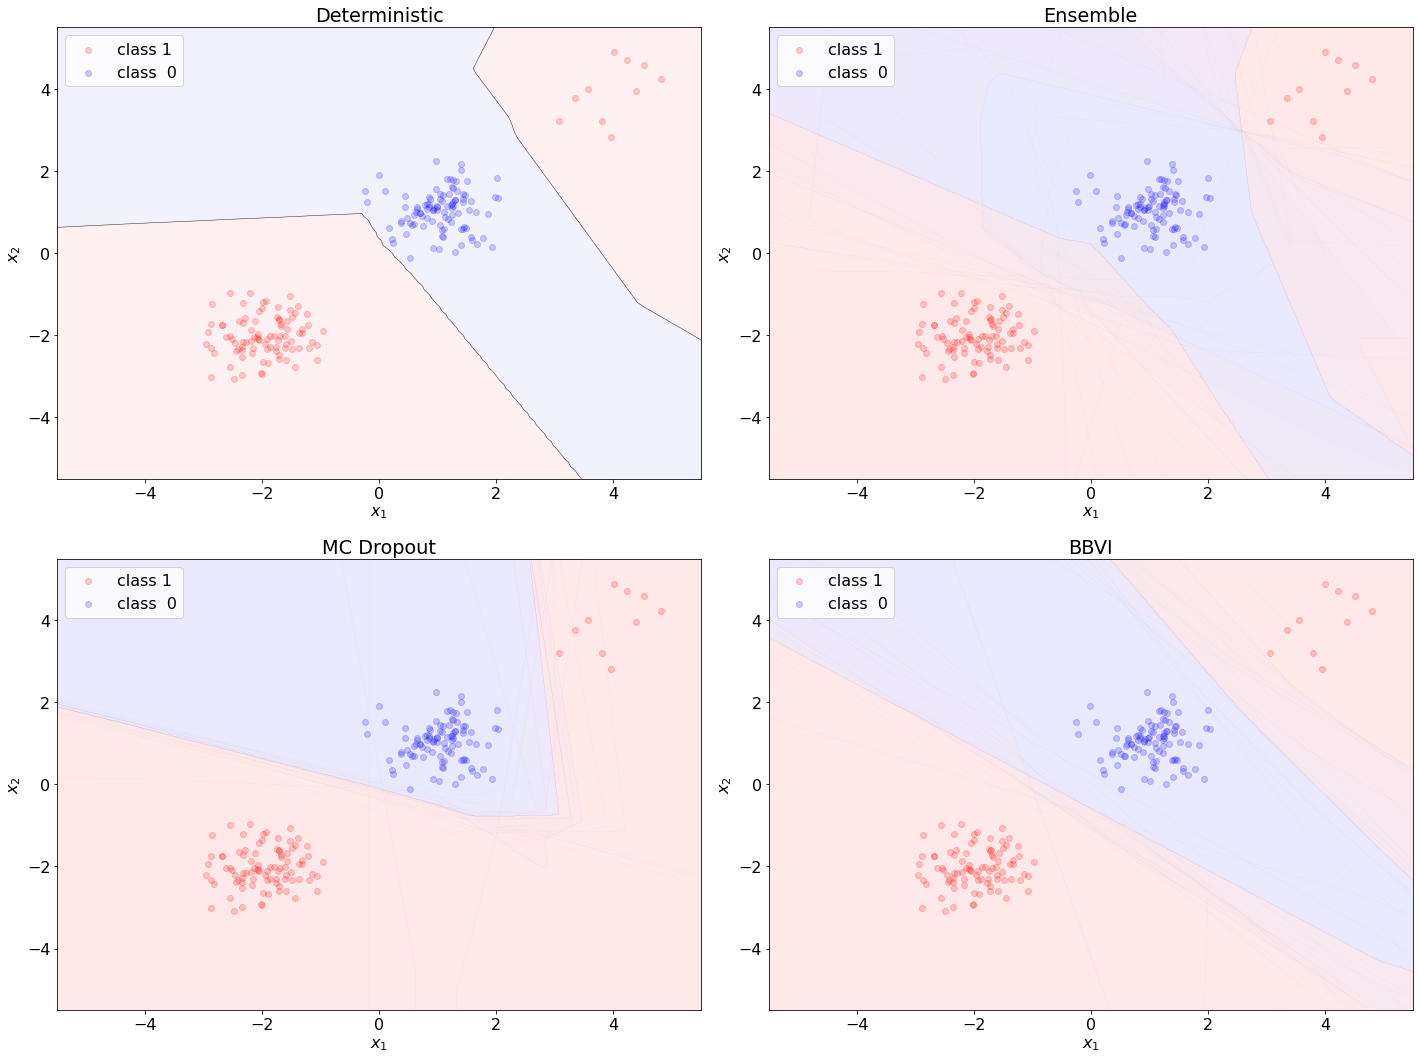

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
k = 0 
models = ['Deterministic', 'Ensemble', 'MC Dropout', 'BBVI']

for i in range(2):
    for j in range(2):
        
        ax[i][j].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
        ax[i][j].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class  0')
        if k == 0: 
            nn_here = [nn]
            #train_acc = get_accuracy('Deterministic', nn, [], x_train, y_train)
        elif k == 1: 
            nn_here = nn_all 
            #train_acc = get_accuracy('Deep Ensemble', nn_all[0], w_bootstrap, x_train, y_train)

        elif k == 2: 
            nn_here = [nn_dropout]*20
            #train_acc = get_accuracy('Dropout', nn_dropout, [nn_dropout.weights]*50, x_train, y_train)
        elif k == 3: 
            nn_here = modsvi
            #train_acc = get_accuracy('MFVI', nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], x_train, y_train)
        plot_decision_boundary(x_train, y_train, nn_here, ax[i][j], poly_degree=1, shaded=True)
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].set_title(models[k])
        ax[i][j].legend(loc='best')
        k+= 1 
plt.tight_layout()
plt.show()

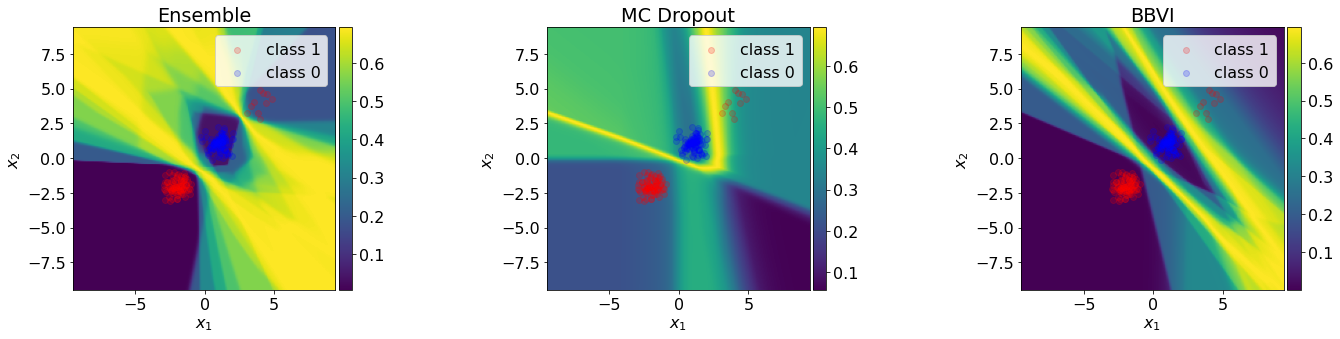

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
models = ['Ensemble', 'MC Dropout', 'BBVI']
for k in range(3):
    plt.rcParams.update({'font.size': 16})
    ax[k].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[k].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    if k == 0: 
        nn_here = nn_all 
        cl=plot_entropycontours(x_train, y_train, nn_here, w_bootstrap, ax[k], models[k], poly_degree=1, shaded=True, interval=np.arange(-10, 10, 0.1))
    
    elif k == 1: 
        nn_here = nn_dropout
        weights_here = [nn_dropout.weights]*50
        cl=plot_entropycontours(x_train, y_train, nn_here, weights_here, ax[k], models[k], poly_degree=1, shaded=True, interval=np.arange(-10, 10, 0.1))

    elif k == 2: 
        nn_here = modsvi
        cl=plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax[k], models[k], poly_degree=1, shaded=True, interval=np.arange(-10, 10, 0.1))
    
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(cl, cax=cax, orientation='vertical');
    ax[k].set_xlabel('$x_1$')
    ax[k].set_ylabel('$x_2$')
    ax[k].set_title(models[k])
    ax[k].legend(loc='best')
    
plt.tight_layout()
plt.show()

## Accuracy vs Retention for different test sets

In [ ]:
# define functions to calculate accuracy and referral rate

def accuracy(retain_perc, N, x_test, y_test):
    dropout_num=50
    auc_dropout = np.zeros([len(retain_perc),dropout_num])
    auc_det = np.zeros([len(retain_perc),N])
    auc_ens = np.zeros([len(retain_perc),len(w_bootstrap)])
    auc_bbvi = np.zeros([len(retain_perc),len(posterior_samples)])
    for (i, perc) in enumerate(retain_perc):
        auc_dropout[i,:] = auc_calc_beta(x_test, y_test, nn_dropout, dropout_num, perc, "mc") #all x, 1 perc, all w
        #posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
        auc_bbvi[i,:] = auc_calc_beta(x_test, y_test, nn, N, perc, "bbvi", weightlist=posterior_samples)
        ensi = auc_calc_beta(x_test, y_test, nn, N, perc, "ensemble", weightlist=w_bootstrap)
        auc_ens[i,:] = ensi #Changed to N
        #print (ensi)
        # use sigmoid probability for retaining data
        auc_det[i,:] = auc_calc_beta(x_test, y_test, nn, N, perc, "deterministic")
    return auc_det, auc_ens, auc_dropout, auc_bbvi


def accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc):

    auc_dropout_ub = np.percentile(auc_dropout, 97.5, axis=1)
    auc_dropout_lb = np.percentile(auc_dropout, 2.5, axis=1)

    auc_ub_ens = np.percentile(auc_ens, 97.5, axis=1)
    auc_lb_ens = np.percentile(auc_ens, 2.5, axis=1)

    auc_ub_bbvi = np.percentile(auc_bbvi, 97.5, axis=1)
    auc_lb_bbvi = np.percentile(auc_bbvi, 2.5, axis=1)
    
    plt.rcParams.update({'font.size': 16})
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    ax[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[0].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    ax[0].scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], alpha=0.8, c='red', label='test class 1')
    ax[0].scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], alpha=0.8, c='blue', label='test class 0')
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')
    ax[0].legend()
    ax[0].set_title('Visualization of training and test sets')
    ax[1].fill_between(retain_perc, auc_dropout_ub, auc_dropout_lb, color='blue', alpha=0.2)
    ax[1].plot(retain_perc, np.mean(auc_dropout,axis=1), 'blue', label='MC dropout')
    ax[1].plot(retain_perc, np.mean(auc_ens,axis=1), 'red', label='Ensemble')
    ax[1].plot(retain_perc, np.mean(auc_bbvi,axis=1), 'purple', label='BBVI')
    ax[1].plot(retain_perc, np.mean(auc_det,axis=1), 'green', label='Deterministic')
    ax[1].fill_between(retain_perc, auc_ub_bbvi, auc_lb_bbvi, color='purple', alpha=0.2)
    ax[1].fill_between(retain_perc, auc_ub_ens, auc_lb_ens, color='red', alpha=0.2)
    ax[1].set_xlabel("Retained Data")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Accuracy of different models")
    ax[1].set_xlim((min(retain_perc), max(retain_perc)))
#     ax[1].set_ylim((30, 90))
    ax[1].legend()
    plt.show()



### On the training data

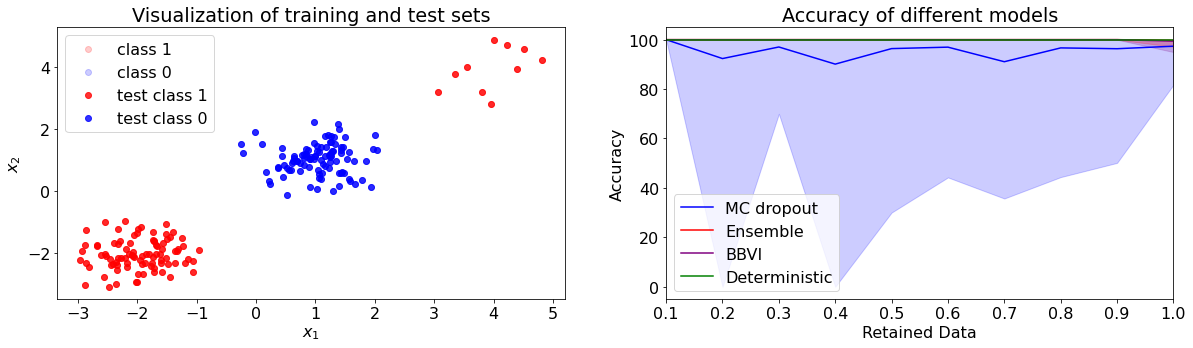

In [ ]:
N=20
retain_perc = np.arange(0.1, 1.1, 0.1)

auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_train, y_train)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_train, y_train, retain_perc)

### Test Dataset 1: 
The test data has the same centers as those of the training clusters, but with a larger spread. <br/>
In this case, we find that the accuracy vs retained fraction curve follows the ideal trend of decrease in accuracy with increase in the retained fraction. The deterministic model also has the least decrease with increase in the retention fraction.

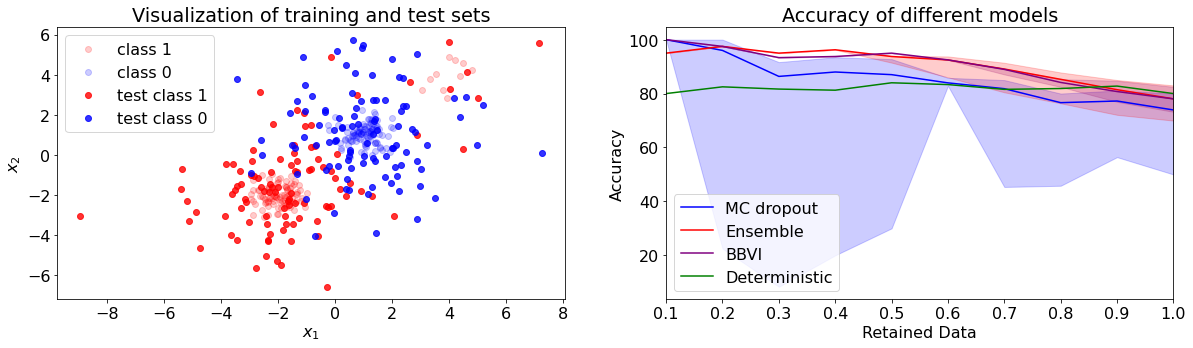

In [ ]:
x_cl2, y_cl2 = generate_3blobs(200, [-2.0, 1.0, 4.0], std=2.0)
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl2, y_cl2)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl2, y_cl2, retain_perc)

### Test Dataset 2.1:
Cluster shifted along the decision boundary: reds from both the outlier pool and the main cluster.

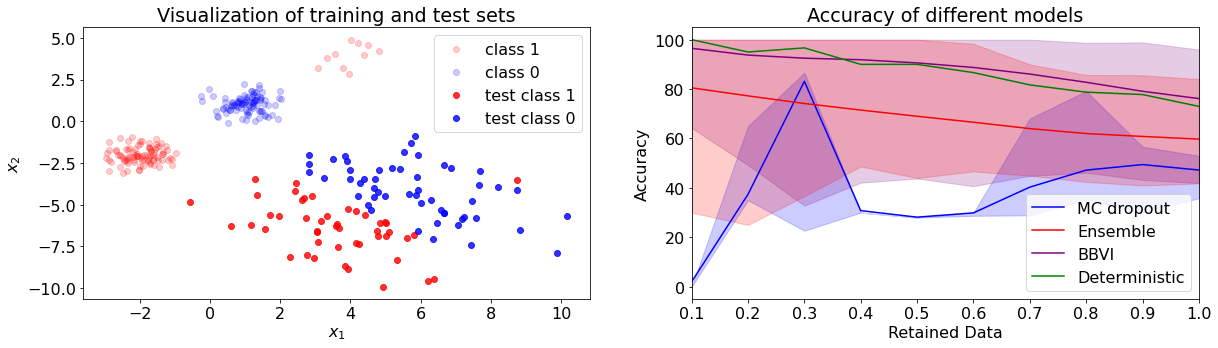

In [ ]:
rng = np.random.default_rng()
x_cl1 = np.hstack([rng.normal(5, 2.0, 100).reshape((-1, 1)), rng.normal(-5, 2.0, 100).reshape((-1, 1))])
distmainred = np.linalg.norm(x_cl1 - np.array([-2, -2]).reshape((-1, 2)), axis=1)
distminred = np.linalg.norm(x_cl1 - np.array([4, 4]).reshape((-1, 2)), axis=1)
distred = np.minimum(distmainred, distminred)
distblue = np.linalg.norm(x_cl1 - np.array([1, 1]).reshape((-1, 2)), axis=1)
closest = np.minimum(distblue, distred)
y_cl1 = np.ones(100)
y_cl1[distblue==closest]=0
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl1, y_cl1)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl1, y_cl1, retain_perc)

### Test Dataset 2.2:
Cluster shifted along the decision boundary: reds only from the outlier pool. This is to simulate situations where our training data may have a bias and we predominantly train on the red cluster that we're less likely to encounter in real data.

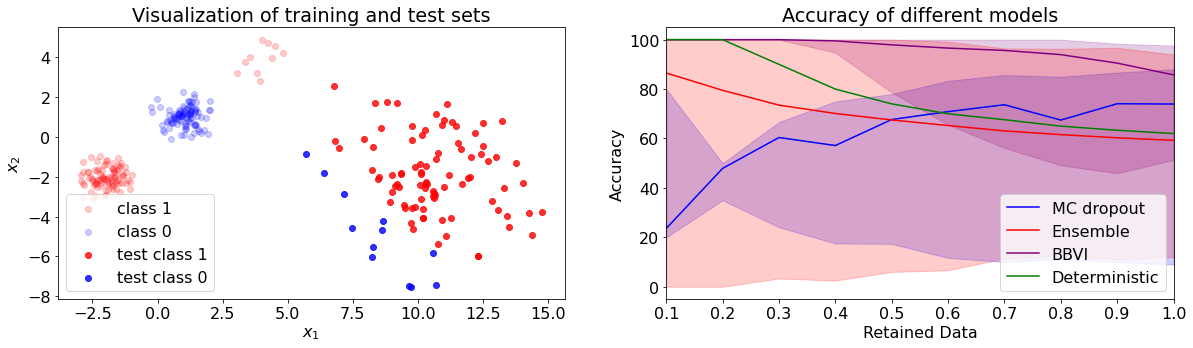

In [ ]:
rng = np.random.default_rng()
x_cl1 = np.hstack([rng.normal(10, 2.0, 100).reshape((-1, 1)), rng.normal(-2, 2.0, 100).reshape((-1, 1))])
distmainred = np.linalg.norm(x_cl1 - np.array([-2, -2]).reshape((-1, 2)), axis=1)
distminred = np.linalg.norm(x_cl1 - np.array([4, 4]).reshape((-1, 2)), axis=1)
distred = np.minimum(distmainred, distminred)
distblue = np.linalg.norm(x_cl1 - np.array([1, 1]).reshape((-1, 2)), axis=1)
closest = np.minimum(distblue, distred)
y_cl1 = np.ones(100)
y_cl1[distblue==closest]=0
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl1, y_cl1)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl1, y_cl1, retain_perc)

### Test Dataset 3.1
Test set between the major red cluster and the blue.

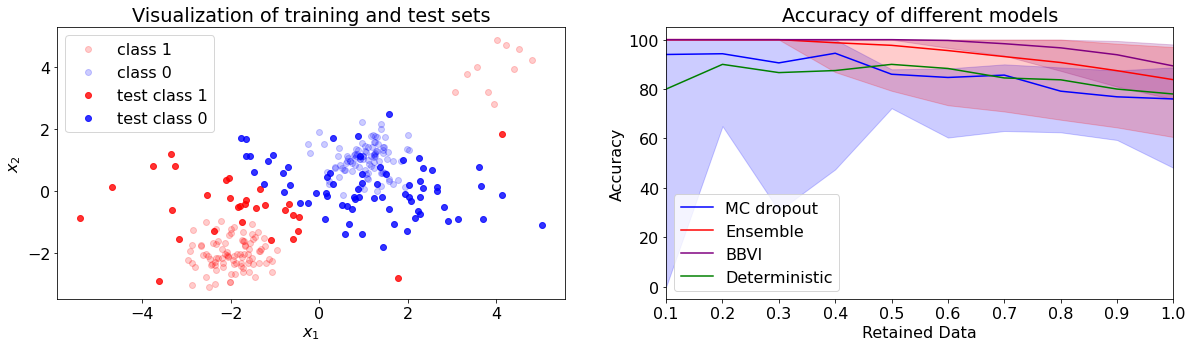

In [ ]:
rng = np.random.default_rng()
x_cl1 = np.hstack([rng.normal(0.0, 2.0, 100).reshape((-1, 1)), rng.normal(0.0, 1.0, 100).reshape((-1, 1))])
distmainred = np.linalg.norm(x_cl1 - np.array([-2, -2]).reshape((-1, 2)), axis=1)
distminred = np.linalg.norm(x_cl1 - np.array([4, 4]).reshape((-1, 2)), axis=1)
distred = np.minimum(distmainred, distminred)
distblue = np.linalg.norm(x_cl1 - np.array([1, 1]).reshape((-1, 2)), axis=1)
closest = np.minimum(distblue, distred)
y_cl1 = np.ones(100)
y_cl1[distblue==closest]=0
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl1, y_cl1)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl1, y_cl1, retain_perc)

### Test Dataset 3.2
Test set between the minor red cluster and the blue.

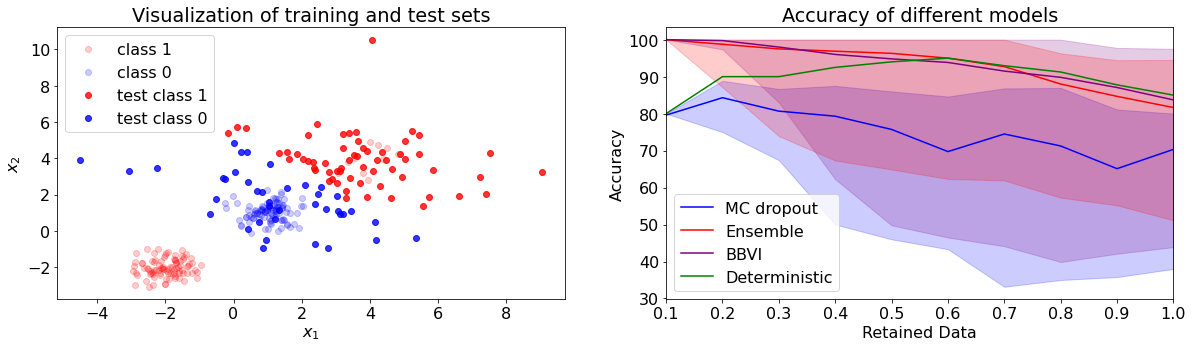

In [ ]:
rng = np.random.default_rng()
x_cl1 = np.hstack([rng.normal(3.0, 2.0, 100).reshape((-1, 1)), rng.normal(3, 2.0, 100).reshape((-1, 1))])
distmainred = np.linalg.norm(x_cl1 - np.array([-2, -2]).reshape((-1, 2)), axis=1)
distminred = np.linalg.norm(x_cl1 - np.array([4, 4]).reshape((-1, 2)), axis=1)
distred = np.minimum(distmainred, distminred)
distblue = np.linalg.norm(x_cl1 - np.array([1, 1]).reshape((-1, 2)), axis=1)
closest = np.minimum(distblue, distred)
y_cl1 = np.ones(100)
y_cl1[distblue==closest]=0
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl1, y_cl1)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl1, y_cl1, retain_perc)

# Experiment 5 

## Circles instead of Gaussian Blobs

In [ ]:
#helper functions

def make_circles(radius,distance, samples):
    angle = np.pi * np.random.uniform(0, 2, samples)
    class_0 = np.vstack((radius*np.cos(angle) - distance/(2*np.sqrt(2)), radius*np.sin(angle) - distance/(2*np.sqrt(2)))).T
    class_1 = np.vstack((radius*np.cos(angle) + distance/(2*np.sqrt(2)), radius*np.sin(angle) + distance/(2*np.sqrt(2)))).T
    x_train = np.vstack((class_0, class_1))
    y_train = np.array([0] * samples + [1] * samples)
    return x_train,y_train

#### Deterministic Model

In [ ]:
samples = 100
radius = 10
distance = 25

x_train,y_train = make_circles(radius,distance,samples)


###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

###neural network model design choices
width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [ ]:
###define design choices in gradient descent
params = {'step_size':1e-4, 
          'max_iteration':20000, 
          'random_restarts':1, 
          'check_point':500}
        
#fit my neural network to minimize Bernoulli lklh on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

#### Ensemble

In [ ]:
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20

# load existing data
if os.path.exists('data/high_dim_deep_ensemble0.pkl'):
    w_bootstrap = [] 
    nn_all = []
    for i in range(N_bootstrap):
        weights_here = pickle.load(open("data/high_dim_deep_ensemble" + str(i) + ".pkl", "rb"))
        w_bootstrap.append(weights_here)

        #set random state to make the experiments replicable
        rand_state = 0
        random = np.random.RandomState(rand_state)
        nn_here = Feedforward(architecture, random=random)
        nn_here.weights = weights_here
        nn_all.append(nn_here)

# if no existing data, do a new run
else: 
    nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)
    
    # save data 
    masterdir = os.getcwd()
    for (i,nn) in enumerate(nn_all):
        with open('data/high_dim_deep_ensemble' + str(i) + '.pkl', 'wb') as f:
            pickle.dump(nn.weights, f, pickle.HIGHEST_PROTOCOL)

#### MC Dropout

In [ ]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

#### MFVI

In [ ]:
S = 20
max_iteration = 9000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*5
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)

In [ ]:
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2

x_test, y_test = make_circles(radius,distance,samples)
posterior_sample_size = 100
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T)
y_predict_noiseless = np.squeeze(y_predict_noiseless)

nn_list = []
for i in range(posterior_sample_size):
    #set random state to make the experiments replicable
    rand_state = 0
    random = np.random.RandomState(rand_state)
    tempNN = Feedforward(architecture, random=random)
    tempNN.weights = np.random.multivariate_normal(var_means, np.diag(var_variance)).reshape((1,var_means.shape[0]))
    nn_list.append(tempNN)

#### Plot Results

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
k = 0 
models = ['Deterministic', 'Ensemble', 'MC Dropout', 'BBVI']
for i in range(2):
    for j in range(2):
        
        ax[i][j].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
        ax[i][j].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class  0')
        if k == 0: 
            nn_here = [nn]
        elif k == 1: 
            nn_here = nn_all 
        elif k == 2: 
            nn_here = [nn_dropout]*100
        elif k == 3: 
            nn_here = nn_list
        plot_decision_boundary(x_train, y_train, nn_here, ax[i][j], poly_degree=1, shaded=True,interval = np.arange(-20,20,0.5))
        ax[i][j].set_xlim((-20, 20))
        ax[i][j].set_ylim((-20, 20))
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].set_title(models[k])
        ax[i][j].legend(loc='best')
        k+= 1 
plt.tight_layout()
plt.show()

## Highly Spaced Gaussian Blobs

#### Deterministic

In [ ]:
sigma = 100000
samples = 100
rs = npr.RandomState(3)
class_0 = rs.multivariate_normal([-sigma, -sigma], sigma*30000 * np.eye(2), samples)
class_1 = rs.multivariate_normal([sigma, sigma], sigma*30000 * np.eye(2), samples)
x_train = np.vstack((class_0, class_1))
y_train = np.array([0] * samples + [1] * samples)

###neural network model design choices
width = 3
hidden_layers = 5
input_dim = x_train.shape[1]
output_dim = 1
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 2
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data

nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 1e-2)


#### MFVI

In [ ]:
S = 20
max_iteration = 7200
step_size = 1e-3

Sigma_W = np.eye(nn.D)
sigma_y = 1

rand_state = 1000
random = np.random.RandomState(rand_state)
variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)

In [ ]:
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2

rs = npr.RandomState(0)
sigma = 100000
samples = 100
class_0 = rs.multivariate_normal([-sigma, -sigma], sigma*30000 * np.eye(2), samples)
class_1 = rs.multivariate_normal([sigma, sigma], sigma*30000 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)


posterior_sample_size = 100
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T)
y_predict_noiseless = np.squeeze(y_predict_noiseless)

nn_list = []
for i in range(posterior_sample_size):
    #set random state to make the experiments replicable
    rand_state = 0
    random = np.random.RandomState(rand_state)
    tempNN = Feedforward(architecture, random=random)
    tempNN.weights = np.random.multivariate_normal(var_means, np.diag(var_variance)).reshape((1,var_means.shape[0]))
    nn_list.append(tempNN)

#### Plot Results

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
k = 0 
models = ['Deterministic',  'BBVI']
for i in range(2):
        
    ax[i].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[i].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class  0')
    if k == 0: 
        nn_here = [nn]
    elif k == 1: 
        nn_here = nn_list
    plot_decision_boundary(x_train, y_train, nn_here, ax[i], poly_degree=1, shaded=True,interval = np.arange(-300000,300000,10000))
    ax[i].set_xlim((-300000, 300000))
    ax[i].set_ylim((-300000, 300000))
    ax[i].set_xlabel('$x_1$')
    ax[i].set_ylabel('$x_2$')
    ax[i].set_title(models[k])
    ax[i].legend(loc='best')
    k+= 1 
plt.tight_layout()
plt.show()

# Broader Impact

Within machine learning, it is imperative to develop criteria for evaluating any given 
models performance not only in terms of its predictive capabilities, but also in terms
of it's uncertainty quantification. A model that is deployed without tests on where it's
uncertainty quantification breaks down can have significant implications on users. One
broader impact of using entropy and accuracy curves to test models is that it is robust
to pathologies such as out of distribution test points, providing a good way of 
characterizing newly developed machine learned models.

Moreover, having a consistent way of benchmarking models in different research areas is
important for testing all facets of possible failure modes for models before depolyment. 
While we have not probed the validity of the Filos et. al. claim for using particular medical
data sets as standardized benchmarks, we note that it is appropriate to both identify 
failure modes that should be sufficiently tested prior to model deployment, as well as 
constructing benchmarks that test against these failure modes. Although the medical data 
used by Filos et. al. may or may not be sufficient for its intended use, nor will it be
universally relevant to all areas of research, it addresses the larger point that all
failure modes of a new model should be checked thoroughly. 

The motivating factor in all of these considerations is the risk imposed to potential
human stakeholders. Upon model depolyment in industries such as health care and finance,
the user should always be aware of the limitations of the machine learned model. These
users could be patients seeking medical treatment, or companies and individuals making
investment decisions. In both cases, as well as many others, appropriate risk 
assessment is essential. As a result, understanding when a model will not give good
uncertainty on out of distribution points is important knowledge.

What are the potential risks to the interest of these stakeholders in the failure modes 
of this technology? Is there potential to exploit this technology for malicious purposes?